<a href="https://colab.research.google.com/github/Shubham-kumar149/Data-Visualization-With-Python/blob/main/ML_Regression_Project_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike Sharing Demand Prediction using Regression**



##### **Project Type**    - Regression

##### **Contribution**    - Individual

##### **Done by -** Shubham Kumar


# **Project Summary -**

The Seoul Bike Sharing Data encapsulated in the 'SeoulBikeData.csv' dataset, provides a comprehensive view of bike usage patterns in the vibrant city of Seoul, South Korea. This dataset encompasses various factors influencing bike demand such as weather conditions, temperature, humidity, time of day etc. The objective of this regression project is to leverage machine learning techniques to predict bike sharing demand accurately, contributing to a better understanding of the factors driving bike utilization in Seoul.

The primary objective of this project is to build a regression model capable of accurately predicting the bike sharing demand in Seoul. This prediction can serve multiple purposes such as optimizing bike allocation, enhancing user experience, aiding city planners in making informed decisions regarding infrastructure development and urban mobility etc.

Some key questions which I tried to answer through this project are:

* What are the primary factors influencing bike sharing demand ?
* How do weather conditions impact the utilization of bike sharing services ?
* Can the time of the day or day of the week be indicative of fluctuations in bike demand ?
* To what extent do holidays affect bike sharing patterns ?

The project will follow a systematic approach commencing with data preprocessing to handle missing values and so on. An Exploratory Data Analysis (EDA) will be conducted to gain a comprehensive understanding of the dataset's distribution, relationships and potential outliers. EDA findings will guide feature selection and engineering, ensuring the model is trained on the most relevant information.

Subsequently, various regression algorithms will be explored such as linear regression, K-nearest neighbor and  random forest to identify the most suitable model for predicting bike-sharing demand. The models will be evaluated using metrics such as Mean Squared Error (MSE) and R-squared, providing a quantitative measure of their performance.

Cross-validation techniques will be applied to ensure the model's generalizability and hyperparameter tuning will be performed to optimize predictive accuracy. The interpretability of the final model will be emphasized to extract actionable insights from the predictions.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation systems.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


At present many metropolitan cities offer bike rentals to improve mobility and convenience. Ensuring a stable supply of rental bikes in urban cities by predicting the demand for bikes at each hour is critical to reduce wait times for the public. Thus making a consistent supply of rental bikes is a major concern for all such facilitators.

Bike sharing systems automate membership, rentals and bike returns through a network of locations. Individuals can rent bikes from one location and return them to another or the same location as per their need. Membership or request facilitates bike rentals and the process is overseen by a citywide network of automated stores.The crucial part is the prediction of bike count required at each hour at a particular location for the stable supply of rental bikes.

This regression project aims to contribute valuable insights and solutions that can lead to continual growth and sustainability of bike-sharing systems.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

#data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px
from scipy.stats import norm

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import neighbors
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/SeoulBikeData.csv'
df = pd.read_csv(path, encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0           -5.200           37   
1  01/12/2017                204     1           -5.500           38   
2  01/12/2017                173     2           -6.000           39   
3  01/12/2017                107     3           -6.200           40   
4  01/12/2017                 78     4           -6.000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200              2000                    -17.600   
1             0.800              2000                    -17.600   
2             1.000              2000                    -17.700   
3             0.900              2000                    -17.600   
4             2.300              2000                    -18.600   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                    0.000         0.000          0.000  Winter  No Holiday   
1                    0.000         0.000          0.000  Winter  No Holiday   
2                    0.000         0.000          0.000  Winter  No Holiday   
3                    0.000         0.000          0.000  Winter  No Holiday   
4                    0.000         0.000          0.000  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19            4.200           34   
8756  30/11/2018                764    20            3.400           37   
8757  30/11/2018                694    21            2.600           39   
8758  30/11/2018                712    22            2.100           41   
8759  30/11/2018                584    23            1.900           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755             2.600              1894                    -10.300   
8756             2.300              2000                     -9.900   
8757             0.300              1968                     -9.900   
8758             1.000              1859                     -9.800   
8759             1.300              1909                     -9.300   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                    0.000         0.000          0.000  Autumn   
8756                    0.000         0.000          0.000  Autumn   
8757                    0.000         0.000          0.000  Autumn   
8758                    0.000         0.000          0.000  Autumn   
8759                    0.000         0.000          0.000  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

print(f"Number of rows in this dataset are: {df.shape[0]}\n\n")
print(f"Number of columns in this dataset are: {df.shape[1]}")

Number of rows in this dataset are: 8760


Number of columns in this dataset are: 14


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Printing Information in more organized way.**

In [8]:
def Data_Info():
  try:
    bike_df = pd.DataFrame(index=df.columns)
    bike_df["Data Types"] = df.dtypes
    bike_df["Non Null Values"] = df.count()
    bike_df["Null Values"] = df.isnull().sum()
    bike_df["% of Null Values"] = (bike_df["Null Values"]/len(df)).round(3)*100
    bike_df["Unique Values"] = df.nunique()

    return bike_df

  except Exception as e:  # Handling exceptions and provide meaningful error messages
    error_message = f"An error occurred: {e}"
    return error_message


Data_Info()

Data Types  Non Null Values  Null Values  \
Date                          object             8760            0   
Rented Bike Count              int64             8760            0   
Hour                           int64             8760            0   
Temperature(°C)              float64             8760            0   
Humidity(%)                    int64             8760            0   
Wind speed (m/s)             float64             8760            0   
Visibility (10m)               int64             8760            0   
Dew point temperature(°C)    float64             8760            0   
Solar Radiation (MJ/m2)      float64             8760            0   
Rainfall(mm)                 float64             8760            0   
Snowfall (cm)                float64             8760            0   
Seasons                       object             8760            0   
Holiday                       object             8760            0   
Functioning Day               object             8760            0   

                           % of Null Values  Unique Values  
Date                                  0.000            365  
Rented Bike Count                     0.000           2166  
Hour                                  0.000             24  
Temperature(°C)                       0.000            546  
Humidity(%)                           0.000             90  
Wind speed (m/s)                      0.000             65  
Visibility (10m)                      0.000           1789  
Dew point temperature(°C)             0.000            556  
Solar Radiation (MJ/m2)               0.000            345  
Rainfall(mm)                          0.000             61  
Snowfall (cm)                         0.000             51  
Seasons                               0.000              4  
Holiday                               0.000              2  
Functioning Day                       0.000              2

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f"Number of duplicate rows are: {df.duplicated().sum()}")

Number of duplicate rows are: 0


In [10]:
print(f"Number of duplicate values in columns are: {df.duplicated(df.columns).sum()}")

Number of duplicate values in columns are: 0


#### Missing Values/Null Values

**In the 'Dataset Information' section we can see that there is no such columns which contains even a single null value.**

In [11]:
# Missing Values/Null Values Count - NOT NULL VALUES EXIST IN ANY COLUMN

In [12]:
# Visualizing the missing values - IRRELEVANT

### What did you know about your dataset?

#### The main highlights of this dataset till now is:


*   Number of rows: 8760
*   Number of columns: 14
*   There are 3 categorical columns, 10 numerical columns and 1 column of 'date'.
*   There are no duplicates rows or columns in it.
*   There is no single columns which contain null values.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns

column_names = df.columns.tolist()
for id, column in enumerate(column_names):
  print(f"Column No. {id + 1}: {column}")

Column No. 1: Date
Column No. 2: Rented Bike Count
Column No. 3: Hour
Column No. 4: Temperature(°C)
Column No. 5: Humidity(%)
Column No. 6: Wind speed (m/s)
Column No. 7: Visibility (10m)
Column No. 8: Dew point temperature(°C)
Column No. 9: Solar Radiation (MJ/m2)
Column No. 10: Rainfall(mm)
Column No. 11: Snowfall (cm)
Column No. 12: Seasons
Column No. 13: Holiday
Column No. 14: Functioning Day


In [14]:
# Dataset Describe

df.describe().T

count     mean     std     min     25%      50%  \
Rented Bike Count         8760.000  704.602 644.997   0.000 191.000  504.500   
Hour                      8760.000   11.500   6.923   0.000   5.750   11.500   
Temperature(°C)           8760.000   12.883  11.945 -17.800   3.500   13.700   
Humidity(%)               8760.000   58.226  20.362   0.000  42.000   57.000   
Wind speed (m/s)          8760.000    1.725   1.036   0.000   0.900    1.500   
Visibility (10m)          8760.000 1436.826 608.299  27.000 940.000 1698.000   
Dew point temperature(°C) 8760.000    4.074  13.060 -30.600  -4.700    5.100   
Solar Radiation (MJ/m2)   8760.000    0.569   0.869   0.000   0.000    0.010   
Rainfall(mm)              8760.000    0.149   1.128   0.000   0.000    0.000   
Snowfall (cm)             8760.000    0.075   0.437   0.000   0.000    0.000   

                               75%      max  
Rented Bike Count         1065.250 3556.000  
Hour                        17.250   23.000  
Temperature(°C)             22.500   39.400  
Humidity(%)                 74.000   98.000  
Wind speed (m/s)             2.300    7.400  
Visibility (10m)          2000.000 2000.000  
Dew point temperature(°C)   14.800   27.200  
Solar Radiation (MJ/m2)      0.930    3.520  
Rainfall(mm)                 0.000   35.000  
Snowfall (cm)                0.000    8.800

### Variables Description

##### This dataset contains 8760 rows and 14 columns. A brief description of columns are as follows:

* **Date:** Date of the rented bike.

* **Rented Bike Count:** Number of total rentals.

* **Hour:** Hours of the day.

* **Temperature(°C):** Weather temperature in °C.

* **Humidity(%):** Humidity of the day in %.

* **Wind speed (m/s):** Wind speed in m/s.

* **Visibility (10m):** Atmospherical visibility within 10 metre range.

* **Dew point temperature(°C):** Dew temperature in °C.

* **Solar Radiation (MJ/m2):** Indicate light and energy that comes from the sun in MJ/$m^2$.

* **Rainfall(mm):** Rainfall in milimetre.

* **Snowfall (cm):** Snowfall in centimetre.

* **Seasons:** Seasons namely Autumn, Spring, Summer and Winter.

* **Holiday:** Whether the day is considered a holiday or not.

* **Functioning Day:** Whether the day is working (neither a weekend nor a holiday) or not.



### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.

for column in df.columns:
  uniq_val = df[column].nunique()
  print(f"Unique values in column  '{column}' is: {uniq_val}\n")

Unique values in column  'Date' is: 365

Unique values in column  'Rented Bike Count' is: 2166

Unique values in column  'Hour' is: 24

Unique values in column  'Temperature(°C)' is: 546

Unique values in column  'Humidity(%)' is: 90

Unique values in column  'Wind speed (m/s)' is: 65

Unique values in column  'Visibility (10m)' is: 1789

Unique values in column  'Dew point temperature(°C)' is: 556

Unique values in column  'Solar Radiation (MJ/m2)' is: 345

Unique values in column  'Rainfall(mm)' is: 61

Unique values in column  'Snowfall (cm)' is: 51

Unique values in column  'Seasons' is: 4

Unique values in column  'Holiday' is: 2

Unique values in column  'Functioning Day' is: 2



## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

# Step 1: Creating copy of this dataset to keep oringal dataset safe.
df = df.copy()

# Step 2: Changing 'Date' column data type from 'object' to datetime format.
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Step 3: Extracting date, month, year and weekday from date and adding to dataset

df['month'] = df['Date'].dt.month  #Extracting month from date

df['day'] = df['Date'].dt.day #Extracting day from date

df['year'] = df['Date'].dt.year #Extracting year from date

df['weekday'] = df['Date'].dt.day_name()  #Extracting weekday from date

# Step 4: Dropping Date column
df.drop(columns=['Date'],inplace=True)

# Step 5: Converting 'Hour' column into categorial by changing its data type
df['Hour']=df['Hour'].astype('object') # As 'Hour' column has numerical value but it explains timestamp.

df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0           -5.200           37             2.200   
1                204    1           -5.500           38             0.800   
2                173    2           -6.000           39             1.000   
3                107    3           -6.200           40             0.900   
4                 78    4           -6.000           36             2.300   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                    -17.600                    0.000   
1              2000                    -17.600                    0.000   
2              2000                    -17.700                    0.000   
3              2000                    -17.600                    0.000   
4              2000                    -18.600                    0.000   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0         0.000          0.000  Winter  No Holiday             Yes      1   
1         0.000          0.000  Winter  No Holiday             Yes      1   
2         0.000          0.000  Winter  No Holiday             Yes      1   
3         0.000          0.000  Winter  No Holiday             Yes      1   
4         0.000          0.000  Winter  No Holiday             Yes      1   

   day  year   weekday  
0   12  2017  Thursday  
1   12  2017  Thursday  
2   12  2017  Thursday  
3   12  2017  Thursday  
4   12  2017  Thursday

### What all manipulations have you done and insights you found?



* 'Date' column is in MM-DD-YYYY format which is not helpful in analysis.
* So it was necessary to extract date, month, year and weekday from 'Date' column and adding them to dataset.
* To do so 'Date' column data type has to be changed from 'object' to datetime format first.
* Hence at first I changed 'Date' column data type from 'object' to datetime format.
* Then extracted date, month, year and weekday from 'Date' column and added them dataset.
* Finally since there was no relevance of 'Date' column then, so I dropped it.
* Although 'Hour' column has numerical value but it explains timestamp.
* So I changed data type of 'Hour' column into 'categorial' one.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

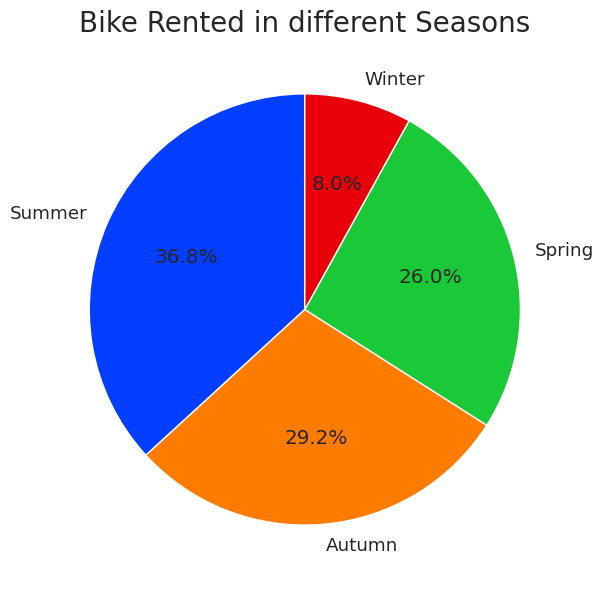

In [17]:
# Chart - 1 visualization code
plt.figure(figsize=(7, 7))  # Setting up the figure with a square aspect ratio
sns.set(font_scale=1.2)
df_grouped = df.groupby('Seasons')['Rented Bike Count'].mean().sort_values(ascending=False).reset_index()

bright_palette = sns.color_palette("bright")  # Selected a bright color palette
plt.pie(df_grouped['Rented Bike Count'], labels=df_grouped['Seasons'], autopct='%1.1f%%', colors=bright_palette, startangle=90)
plt.title("Bike Rented in different Seasons", fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

I used a pie chart to visualize the distribution of rented bikes across different seasons. The choice of a pie chart is suitable for conveying the proportion of bike rentals in each season, allowing for a clear and concise presentation of how the total bike count is distributed among the different seasons.

##### 2. What is/are the insight(s) found from the chart?

* From the chart, it is evident that demand of rental bikes is at its peak in 'Summer' season i.e. 36.8%.
* The demand of rental bikes in 'Summer' season is approximately equal to sum total of demands in 'Autumn' and 'Winter' seasons and it is even more than that of 'Spring' and 'Winter' seasons togetrher.
* The demand percentage in "winter' season is in single digit (8%) whcih shows that it is least preferred season to rent a bike.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pie chart can potentially lead to positive business impacts. By understanding the distribution of bike rentals across seasons, businesses and bike-sharing operators can strategically plan and allocate resources.

**Insights that lead to negative growth:**

'Winter' season shows very low bike rental counts which indicates challenges during off-peak periods. Understanding the reasons behind low demand such as adverse weather conditions, events or specific holidays, can help operators develop strategies to address these challenges.

#### Chart - 2

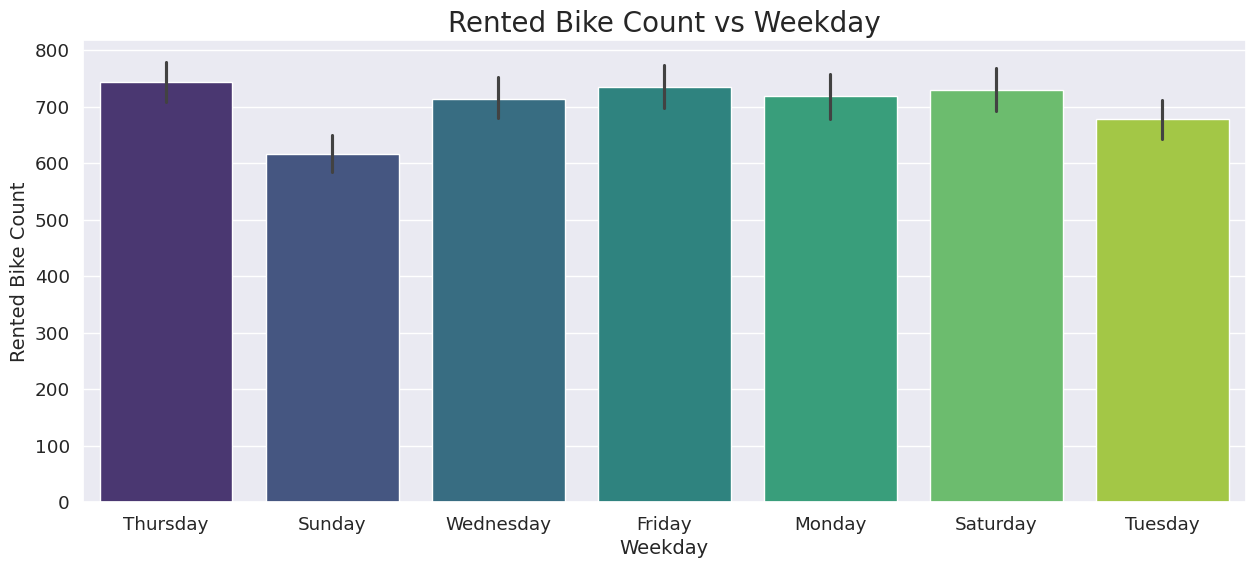

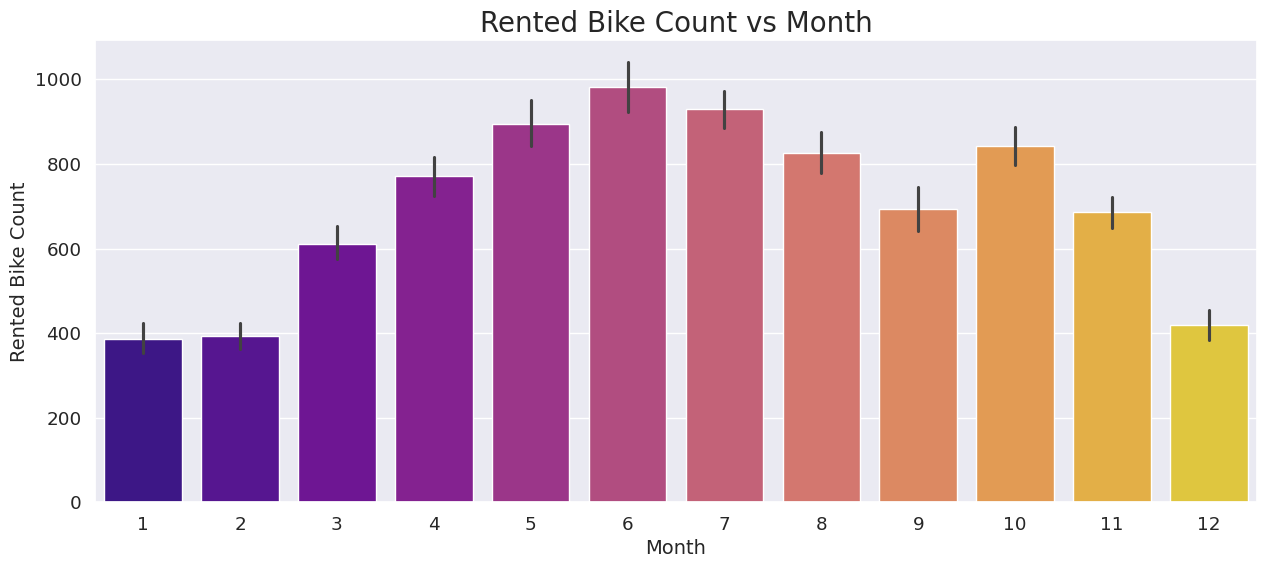

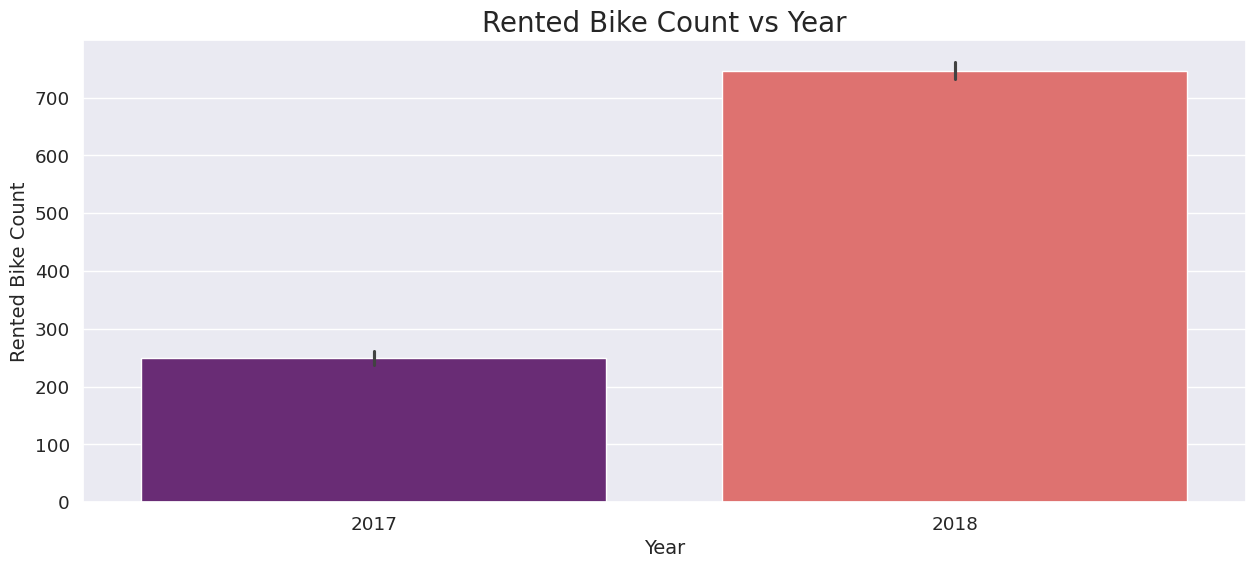

In [18]:
# Chart - 2 visualization code

# Plotting for 'Day'
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='weekday', y='Rented Bike Count', palette='viridis')
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)
plt.title("Rented Bike Count vs Weekday", fontsize=20)
plt.show()

# Plotting for 'Month'
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='month', y='Rented Bike Count', palette='plasma')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)
plt.title("Rented Bike Count vs Month", fontsize=20)
plt.show()

# Plotting for 'Year'
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='year', y='Rented Bike Count', palette='magma')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)
plt.title("Rented Bike Count vs Year", fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

I opted for bar charts for visualizing the rental bike count for Weekday, Month and Year because it is effective for showing the distribution of rented bike counts across different days of the week, different months and different years.

##### 2. What is/are the insight(s) found from the chart?

**Weekday:**

* It appears that Thursday exhibits highest rental counts while Sunday exhibits lowest rental counts.
* Remaining days of the week shows near about similar number of rental counts.

**Month:**

* As we move from January onwards, number of rental bike counts keep on increasing and it reaches its peak in the month of June.
* From June onwards it starts decreasing with a single exception in the month of October.
* Particulary we can see that the month of December, January and February together has similar and the lowest rental count while the month of May, June and July together has approx similar and the highest rental count, which may be attributed to weather conditions.

**Year:**

* There seems to be a positive and potential growth in bike-sharing demand from the year 2017 to the year 2018.
* This is evident from the fact that number of rental bikes has increased aprroximately three-fold in the year 2018 as compared to its previous year.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these charts can contribute to a positive business impact:

* **Operational Planning:** Understanding the weekly and monthly patterns can help in optimizing bike allocation and operational planning. For example, adjusting the number of available bikes on weekdays and during peak months can enhance efficiency.

* **Marketing Strategies:** Recognizing the positive trend over the years can be used in marketing strategies to promote bike-sharing services.



No, I do not find any specific insight that could lead to negative growth.

#### Chart - 3

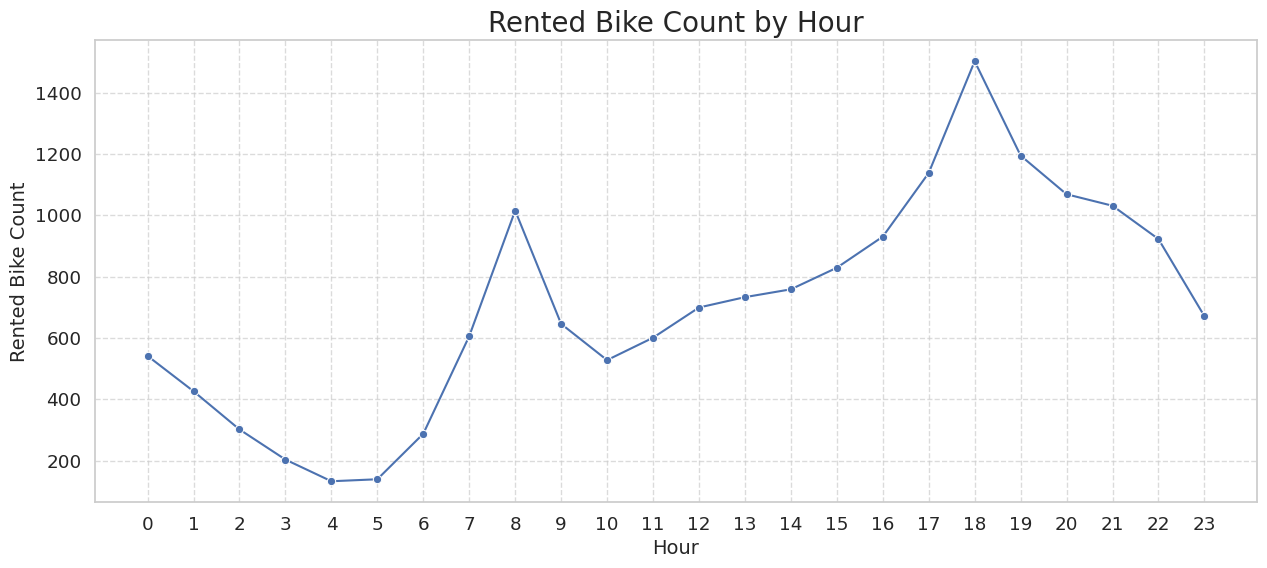

In [19]:
# Chart - 3 visualization code

sns.set_style("whitegrid")  # For better visualization
plt.figure(figsize=(15, 6)) # Setting up the figure and axes

sns.lineplot(data=df, x='Hour', y='Rented Bike Count', ci=None, marker='o', palette=sns.color_palette("bright")) # Plotting the line graph

# Customizing the plot
plt.title('Rented Bike Count by Hour', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.xticks(range(24))  # Setting x-axis ticks for each hour
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

* I picked a line chart to visualize the rental bike count by hour because it is particularly effective in illustrating trends and patterns over time.

* The X-axis represents hours of the day while the Y-axis displays the rented bike count, allowing for easy interpretation of variations in demand.

##### 2. What is/are the insight(s) found from the chart?

* **Peak Hours:** There are distinct peaks in bike rental counts such as 8 a.m. in the morining and 6 p.m. in the evening which indicates hours of the day when demand is highest.

* **Off-Peak Hours:** Conversely, there are hours with lower rental counts i.e. 4 to 5 a.m. in the morning which suggests periods when demand is lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can indeed contribute to a positive business impact for a bike-sharing service:

* **Resource Optimization:** Knowing the peak hours allows the business to optimize the distribution of bikes and ensuring that an adequate number is available during high-demand periods.

* **Marketing Strategies:** Promotions or incentives during off-peak hours may encourage users to choose bike-sharing services which could potentially increase overall usage and revenue.

* **Operational Efficiency:** The insights help in planning operational activities more efficiently such as maintenance schedules and workforce management. For example during off-peak hours maintenance activities can be prioritized without significantly impacting user experience.

#### Chart - 4

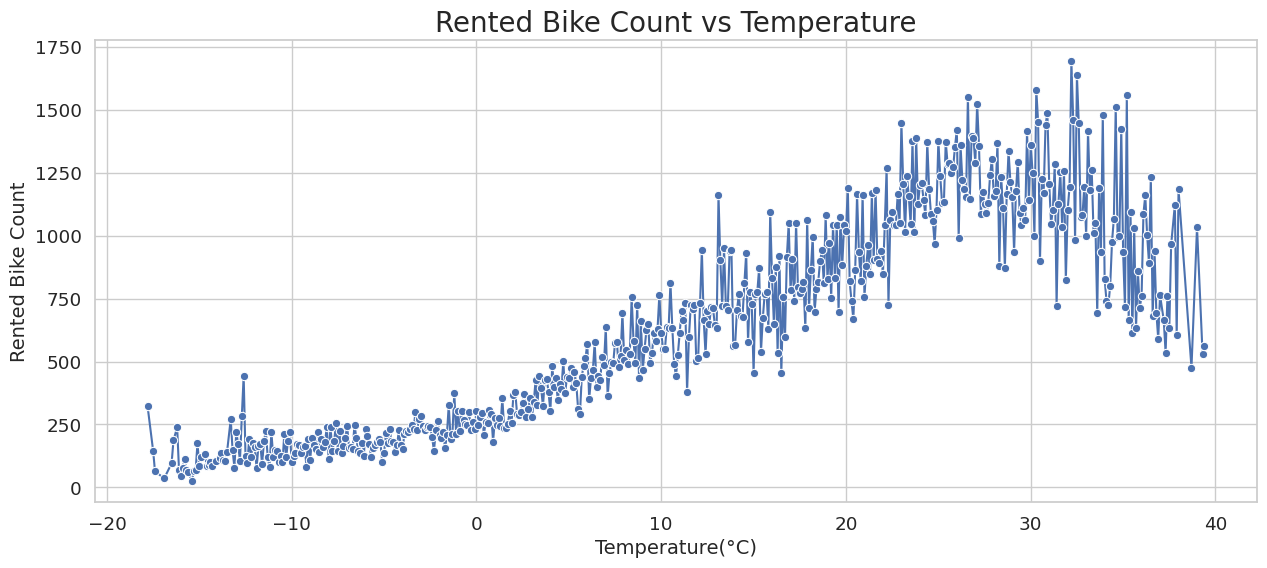

In [20]:
# Chart - 4 visualization code

df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum()) # Creating a dataframe which has the count of bikes rented in different temperature
df_temp.reset_index(inplace=True) # Reordered the index number

sns.set_style("whitegrid")  # For better visualization
plt.figure(figsize=(15, 6)) # Setting up the figure and axes
sns.lineplot(data=df, x='Temperature(°C)', y='Rented Bike Count', ci=None, marker='o', palette=sns.color_palette("bright")) # Plotting the line graph

# Set labels and title
plt.xlabel('Temperature(°C)', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.title('Rented Bike Count vs Temperature', fontsize=20)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

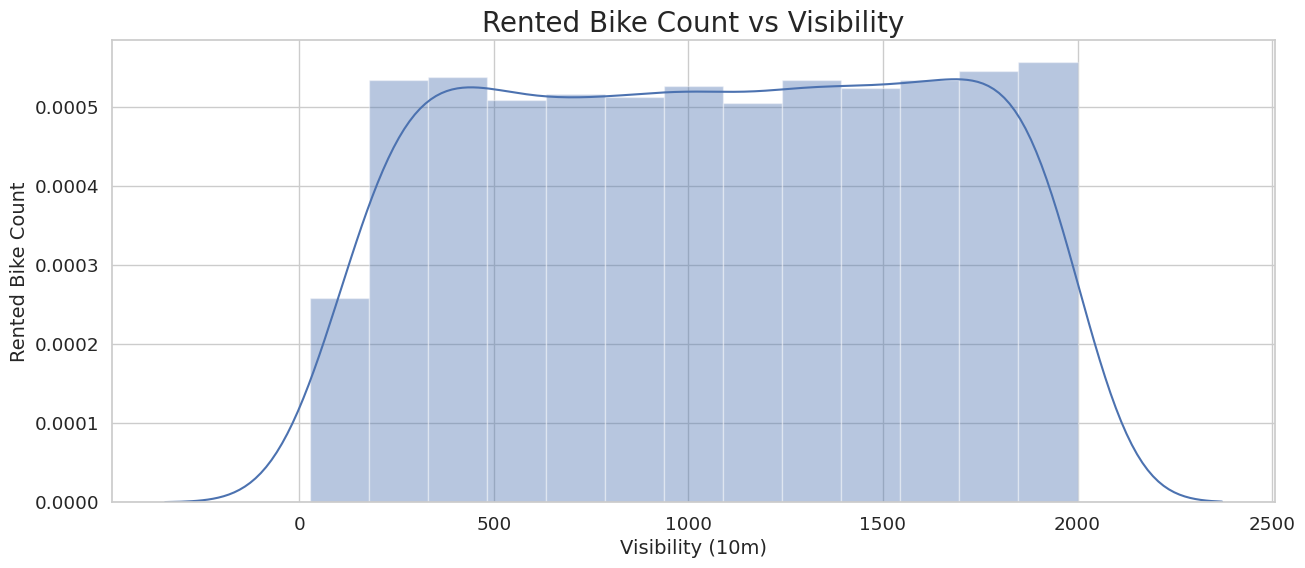

In [21]:
# Chart - 5 visualization code
df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum()) # Creating a dataframe which has the count of bikes rented in differant visibility ranges
df_visi.reset_index(inplace=True)

plt.figure(figsize=(15,6))
sns.distplot(df_visi['Visibility (10m)'])
# Set labels and title
plt.xlabel('Visibility (10m)', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.title('Rented Bike Count vs Visibility', fontsize=20)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

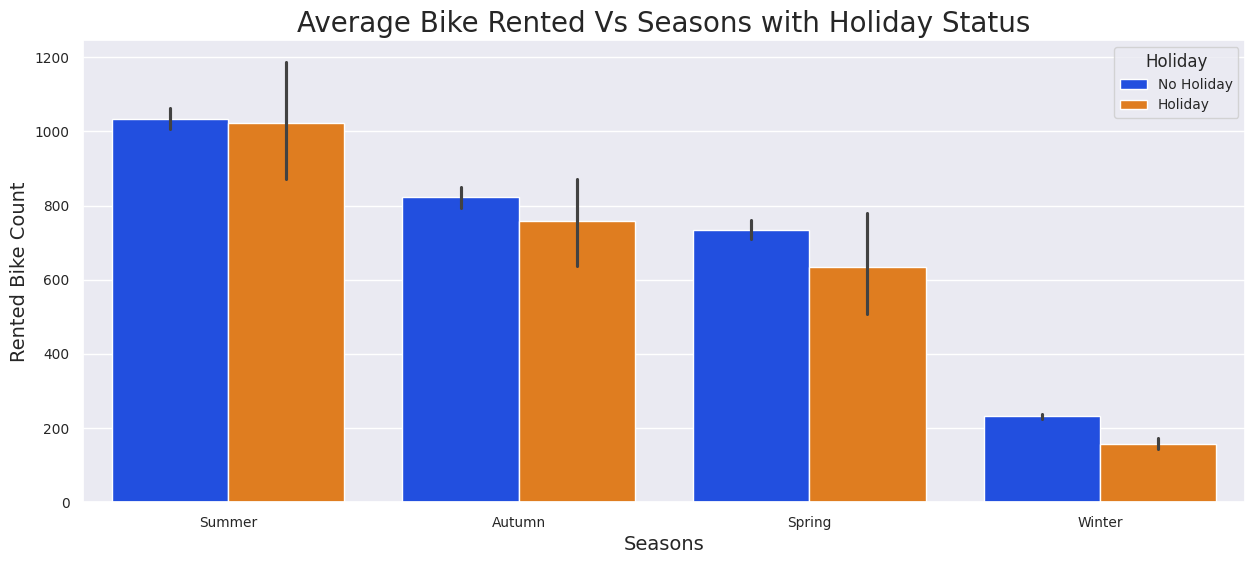

In [22]:
# Chart - 6 visualization code

plt.figure(figsize=(15, 6)) # Setting up the figure and axes
sns.set(font_scale=0.9)
df_sorted = df.sort_values(by='Rented Bike Count', ascending=False)   # Sorted the DataFrame by 'Rented Bike Count' in descending order
bright_palette = sns.color_palette("bright")  # Selected a bright color palette
sns.barplot(data=df_sorted, x='Seasons', y='Rented Bike Count', hue='Holiday', palette=bright_palette)
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)
plt.title("Average Bike Rented Vs Seasons with Holiday Status", fontsize=20)
plt.legend(title='Holiday', title_fontsize='12')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

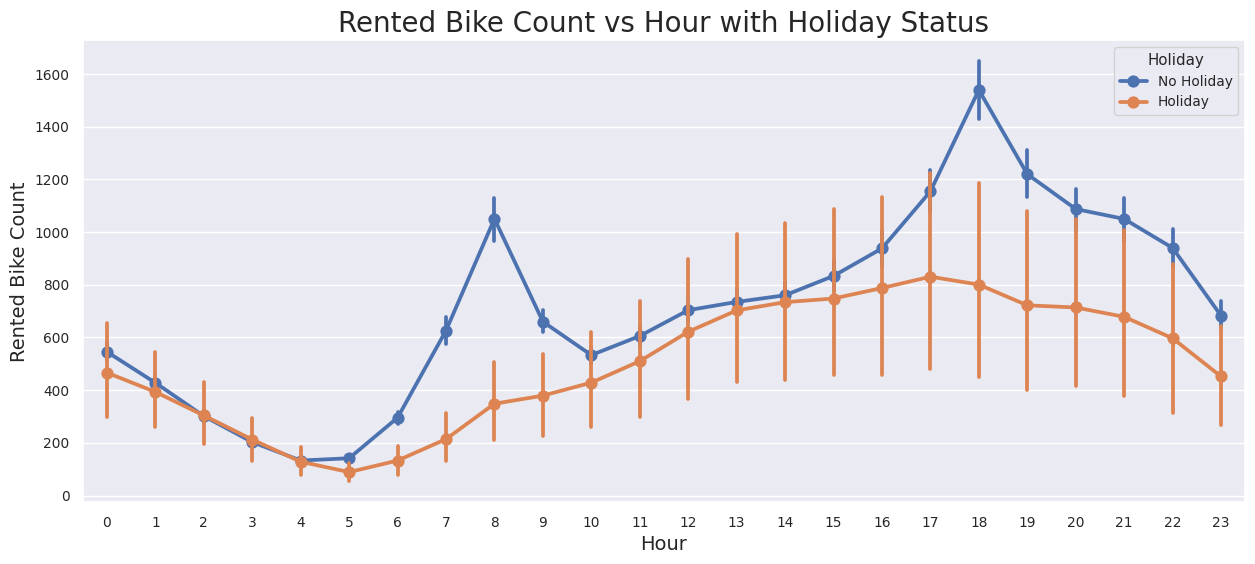

In [23]:
# Chart - 7 visualization code
plt.figure(figsize=(15, 6))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday')
plt.title('Rented Bike Count vs Hour with Holiday Status', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

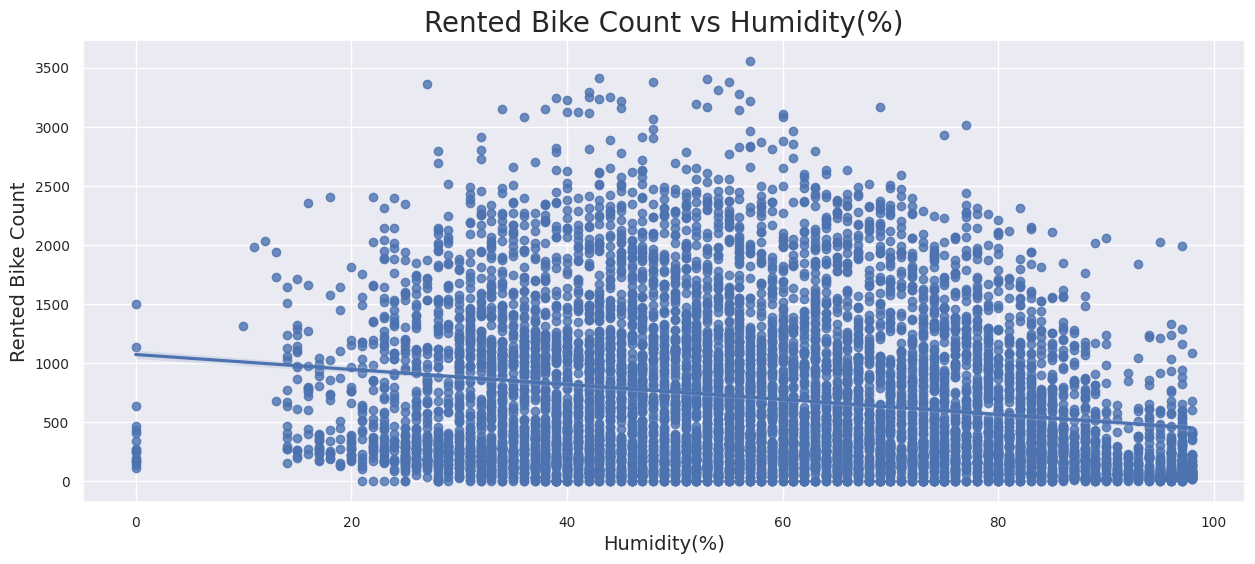

In [24]:
# Chart - 8 visualization code
plt.figure(figsize=(15, 6))
sns.regplot(x='Humidity(%)',y='Rented Bike Count',data=df)  # Rented Bike Count Vs Humidity
plt.title('Rented Bike Count vs Humidity(%)', fontsize=20)
plt.xlabel('Humidity(%)', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

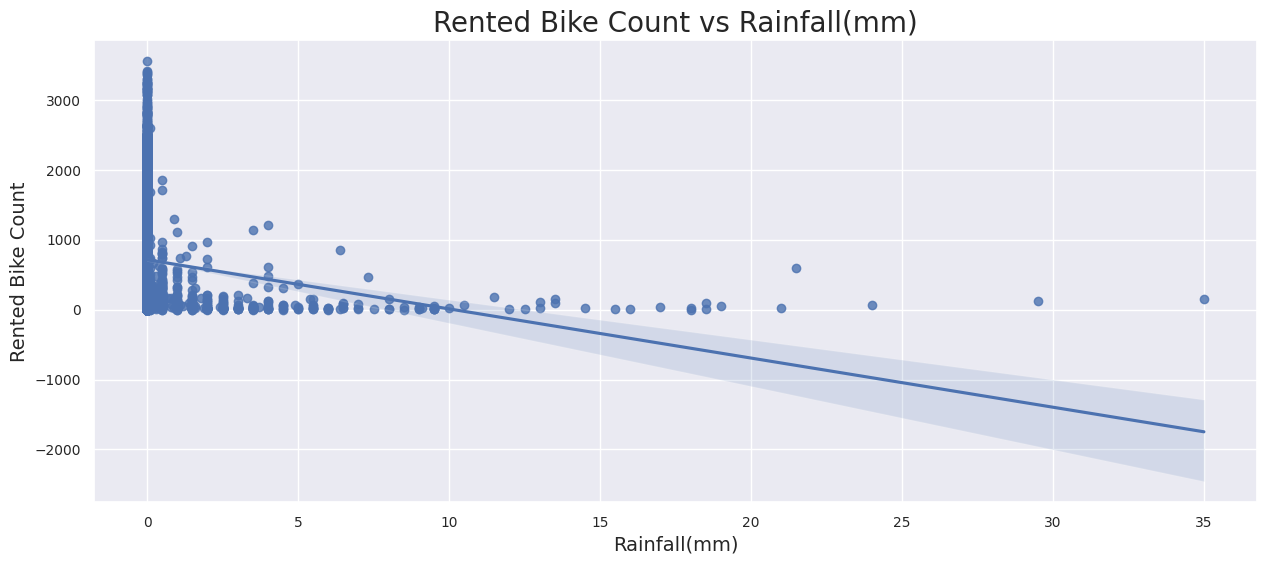

In [25]:
# Chart - 9 visualization code
plt.figure(figsize=(15, 6))
sns.regplot(x='Rainfall(mm)',y='Rented Bike Count',data=df)  # Rented Bike Count Vs Humidity
plt.title('Rented Bike Count vs Rainfall(mm)', fontsize=20)
plt.xlabel('Rainfall(mm)', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

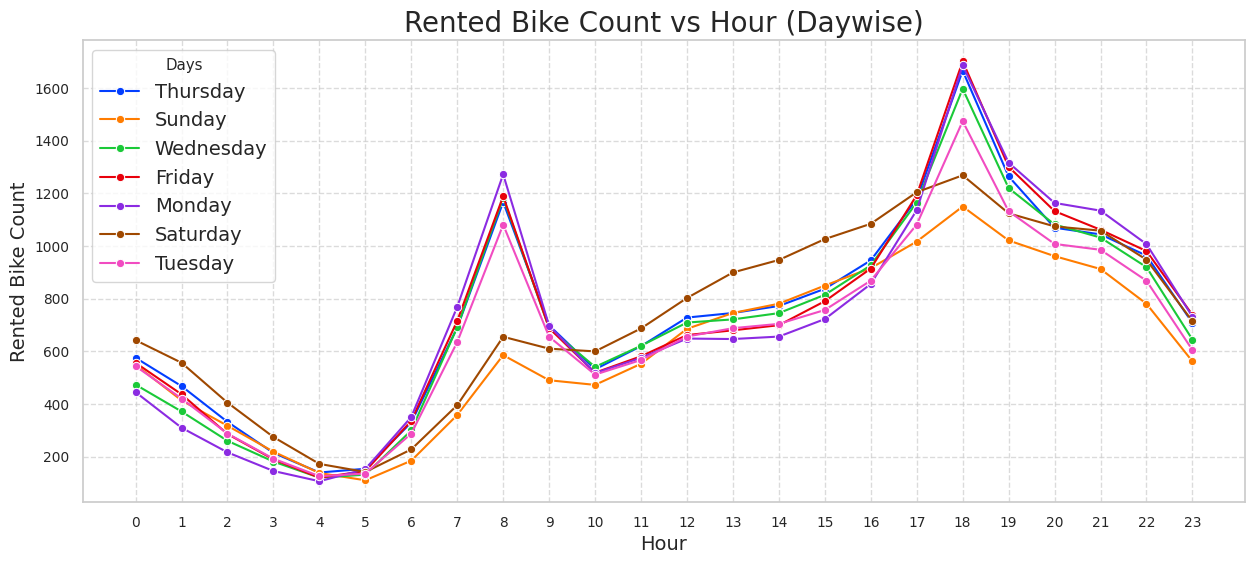

In [26]:
# Chart - 10 visualization code

sns.set_style("whitegrid")  # For better visualization
plt.figure(figsize=(15, 6))  # Setting up the figure and axes

sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='weekday', ci=None, marker='o', palette=sns.color_palette("bright"))  # Plotting the line graph with Temperature as hue

# Customizing the plot
plt.title('Rented Bike Count vs Hour (Daywise)', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.xticks(range(24))  # Setting x-axis ticks for each hour
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Days', loc='upper left', fontsize=14)  # Display legend for Temperature

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

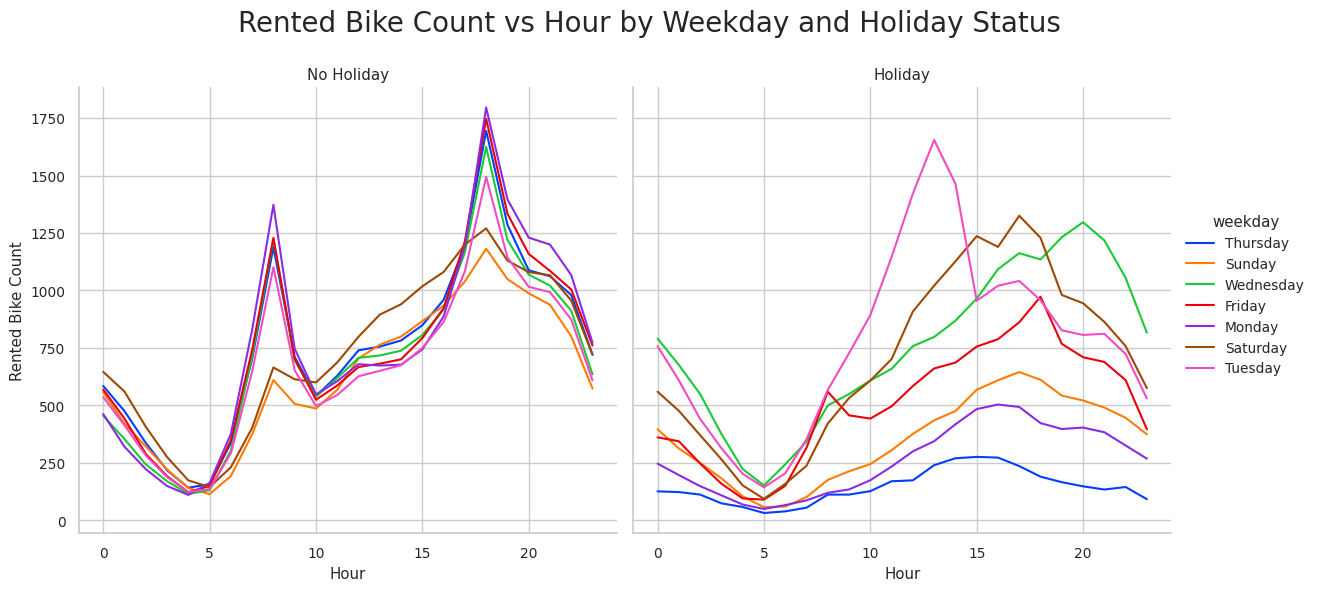

In [27]:
# Chart - 11 visualization code

# Create subplots using relplot
g = sns.relplot(data=df, x='Hour', y='Rented Bike Count', hue='weekday', col='Holiday', kind='line', ci=None, markers=True, dashes=False,
                palette=sns.color_palette("bright"), height=6, aspect=1)

# Customizing the plot
g.fig.suptitle('Rented Bike Count vs Hour by Weekday and Holiday Status', fontsize=20)
g.set_axis_labels('Hour', 'Rented Bike Count')
g.set_titles(col_template="{col_name}")

# Adjust layout
plt.subplots_adjust(top=0.85)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

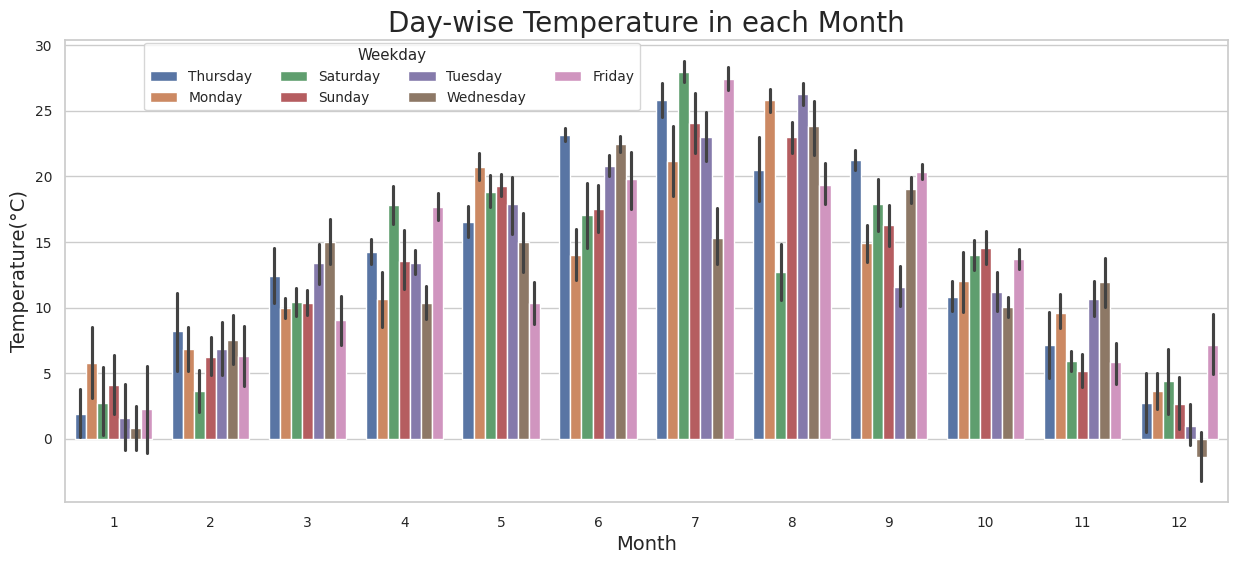

In [28]:
# Chart - 12 visualization code
#Bar plot for seasonwise monthly distribution of Rented_Bike_Count
plt.figure(figsize=(15,6))
#sns.barplot(x='month',y='Rented Bike Count',data=df, hue='Seasons')
sns.barplot(x='month',y='Temperature(°C)',data=df, hue='weekday')
plt.title('Day-wise Temperature in each Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature(°C)', fontsize=14)
# Display legend in horizontal direction at the top
plt.legend(title='Weekday', loc='upper right', bbox_to_anchor=(0.5, 1.01), ncol=4)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

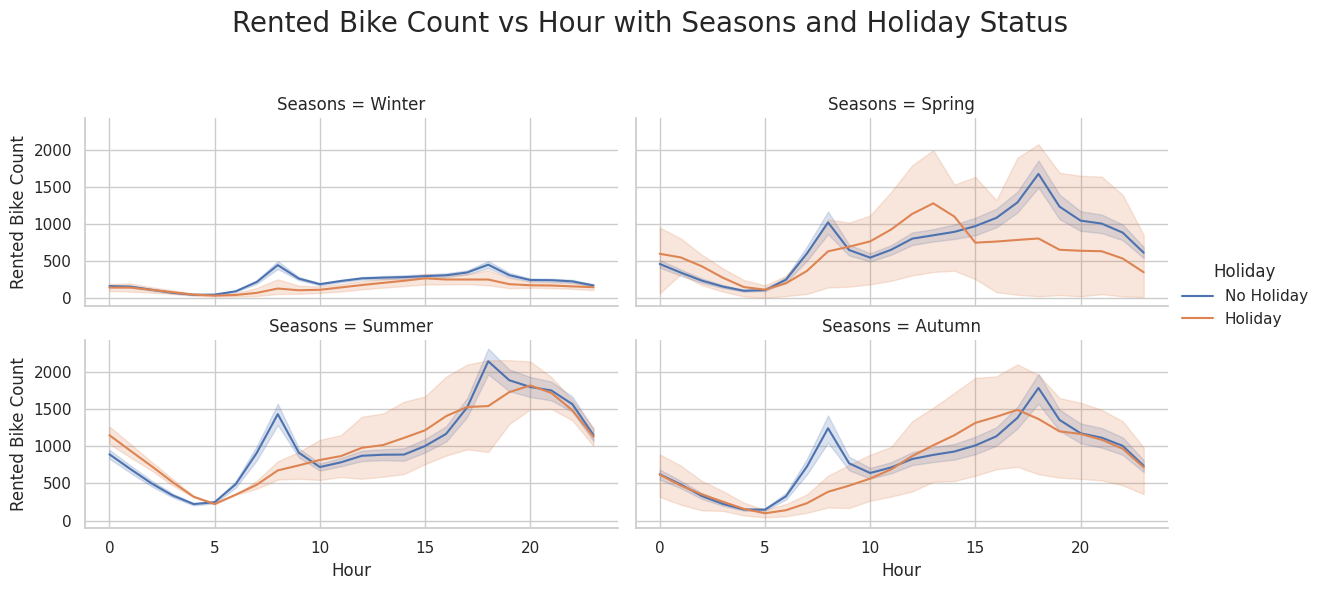

In [29]:
# Chart - 13 visualization code
# Set the default style for seaborn
sns.set(style="whitegrid")

# Create subplots for each season with controlled size
g = sns.relplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday', col='Seasons', kind='line', markers=True, dashes=False, col_wrap=2, height=3, aspect=2)

# Set titles and labels
g.fig.suptitle('Rented Bike Count vs Hour with Seasons and Holiday Status', fontsize=20)
g.set_axis_labels('Hour', 'Rented Bike Count')
# Adjust layout to prevent overlap
plt.subplots_adjust(top=0.8)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

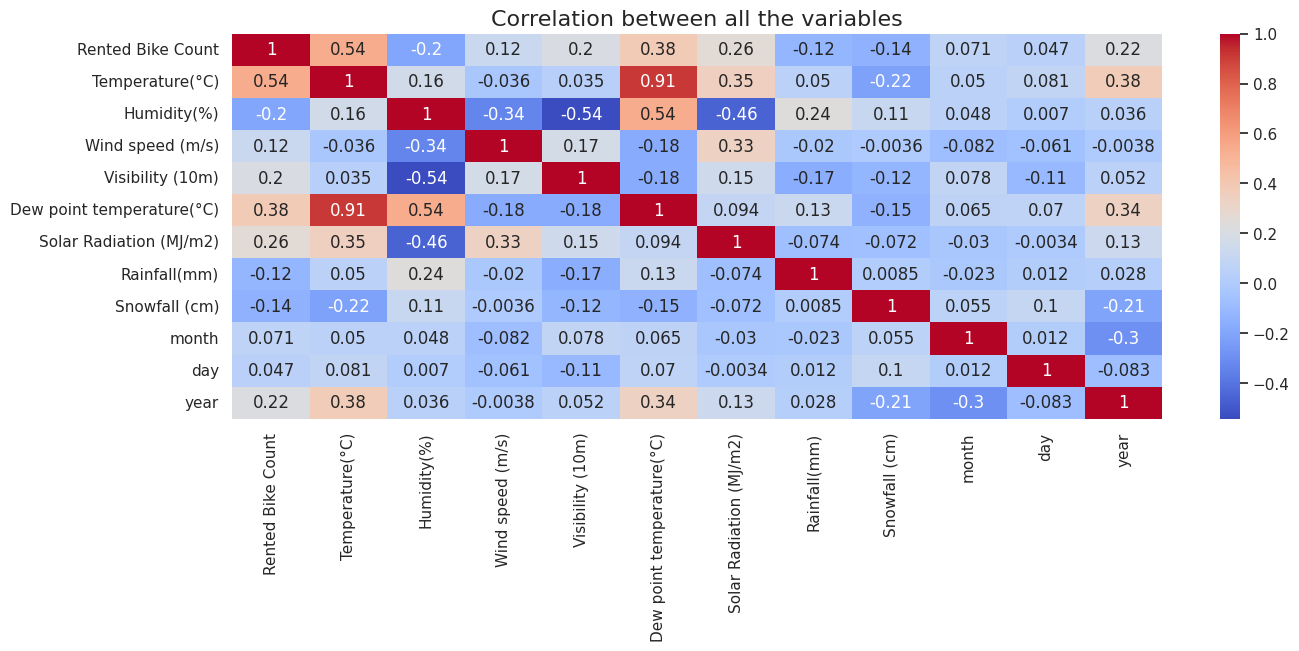

In [30]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the variables', size=16)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

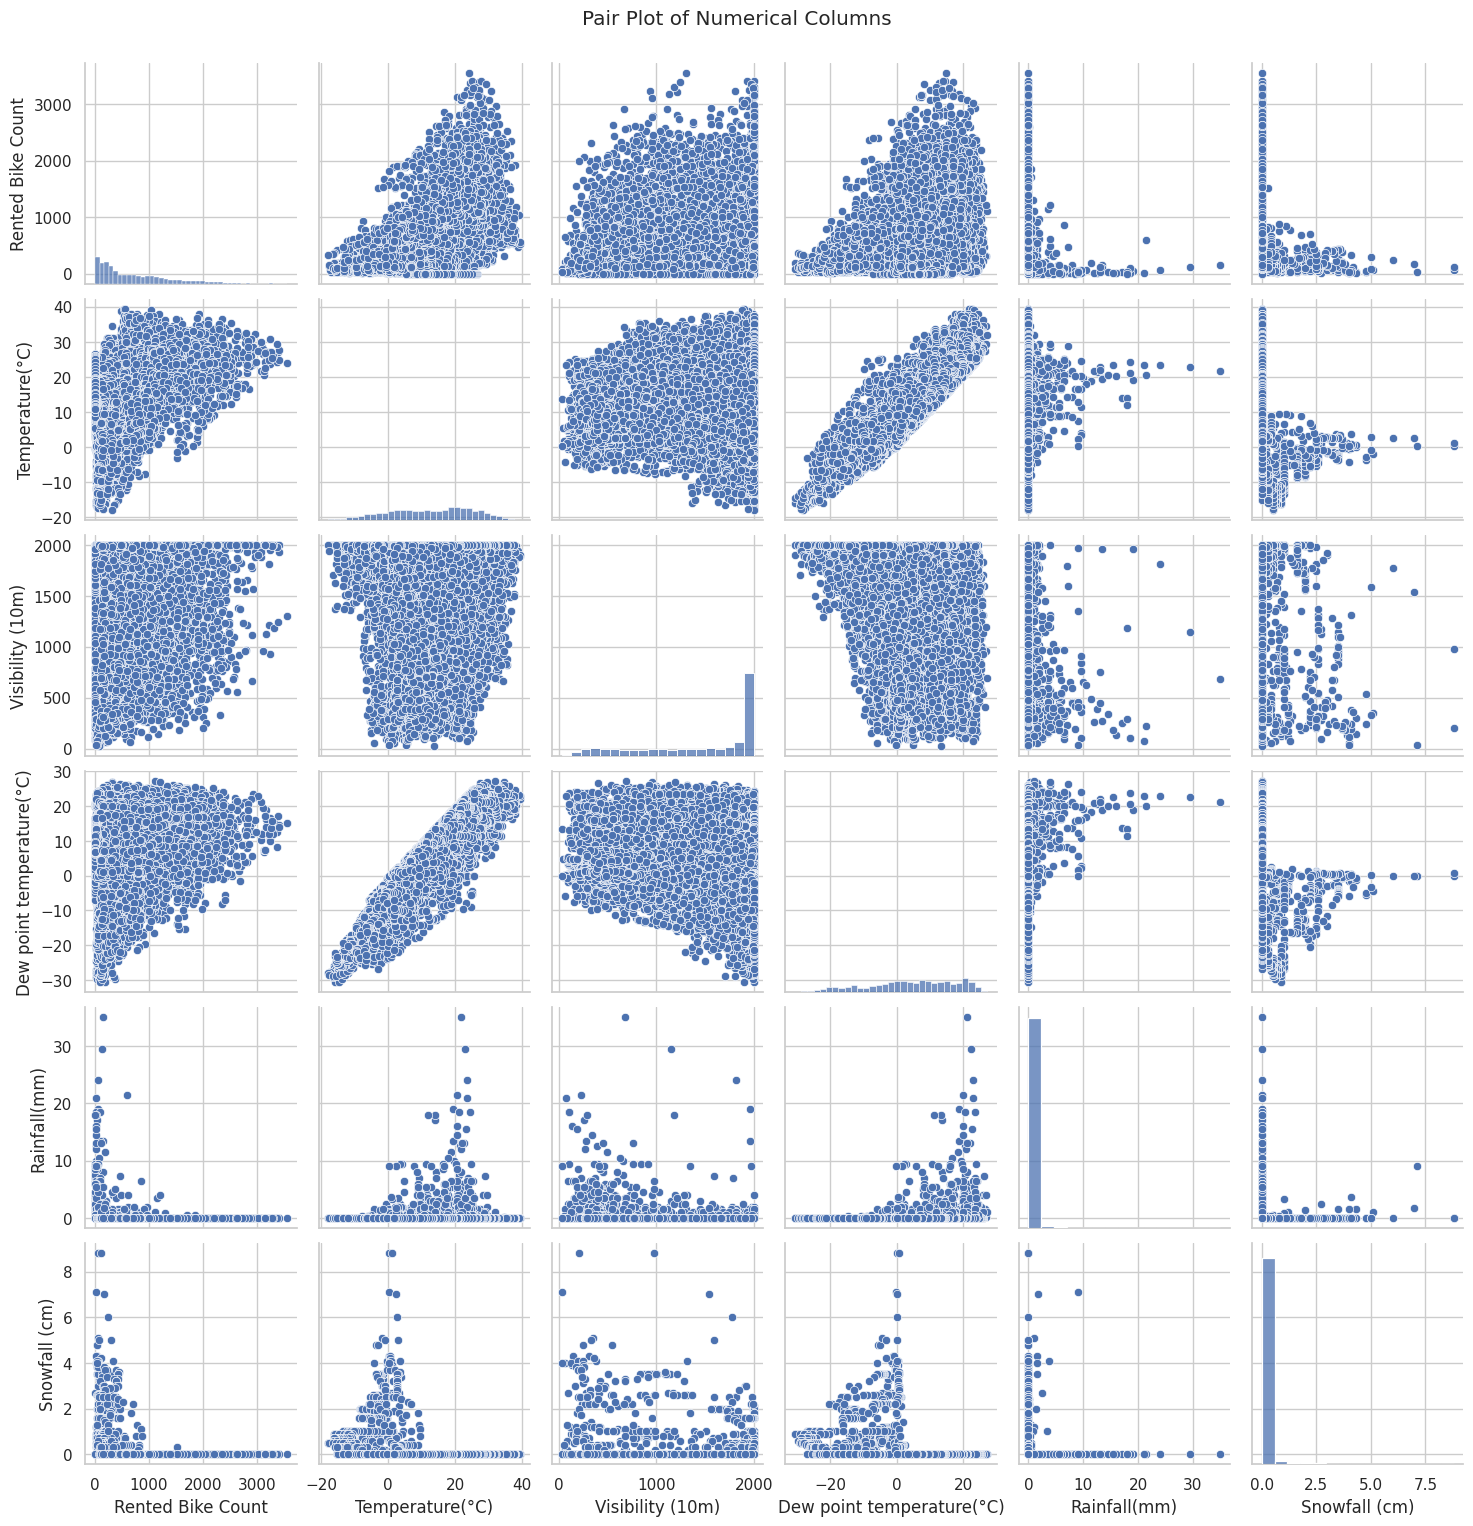

In [31]:
# Pair Plot visualization code
numerical_columns = ['Rented Bike Count','Temperature(°C)',	'Visibility (10m)', 'Dew point temperature(°C)', 'Rainfall(mm)'	,'Snowfall (cm)']
df_numeric = df[numerical_columns]
sns.pairplot(data=df_numeric)
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### **Hypothetical Statement - 1**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): The mean rented bike count is the same for different seasons.

Alternate Hypothesis ($H_A$): The mean rented bike count varies significantly across seasons.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

anova_result = stats.f_oneway(df['Rented Bike Count'][df['Seasons'] == 'Summer'],
                              df['Rented Bike Count'][df['Seasons'] == 'Winter'],
                              df['Rented Bike Count'][df['Seasons'] == 'Spring'],
                              df['Rented Bike Count'][df['Seasons'] == 'Autumn'])

# Post-hoc analysis using Tukey's HSD test
tukey_result = pairwise_tukeyhsd(df['Rented Bike Count'], df['Seasons'])

# Display ANOVA and Tukey's HSD results
print("ANOVA P-Value:", anova_result.pvalue)
print(tukey_result)


ANOVA P-Value: 0.0
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
Autumn Spring  -89.5667   0.0 -134.0266  -45.1069   True
Autumn Summer  214.4754   0.0  170.0156  258.9352   True
Autumn Winter -594.0568   0.0 -638.7616  -549.352   True
Spring Summer  304.0421   0.0  259.7039  348.3803   True
Spring Winter   -504.49   0.0 -549.0739 -459.9062   True
Summer Winter -808.5322   0.0  -853.116 -763.9483   True
--------------------------------------------------------


#### **Conclusion:**

The p-value obtained from the ANOVA test is 0.0, which is less than the significance level of 0.05. This suggests that there is significant evidence to **reject the null hypothesis** that the mean rented bike count is the same across different seasons.

The post-hoc Tukey's HSD test indicates significant differences in the mean rented bike count between all pairs of seasons (Autumn, Spring, Summer, Winter). The **rejection of the null hypothesis in the Tukey's HSD test** for all pairs suggests that there are significant variations in the mean rented bike count between each season.

The analysis suggests that the mean rented bike count varies significantly across different seasons (**as evident in Chart-1**).

##### Which statistical test have you done to obtain P-Value?

I have done **One-way ANOVA (Analysis of Variance)** test.

##### Why did you choose the specific statistical test?

**One-way ANOVA** is appropriate for comparing means across more than two groups (i.e. Seasons in this case).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): There is no difference in the mean rented bike count during Holidays compared to non-Holidays.

Alternate Hypothesis ($H_A$): The mean rented bike count is different during Holidays compared to non-Holidays.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

holiday_group = df['Rented Bike Count'][df['Holiday'] == 'Holiday' ]
non_holiday_group = df['Rented Bike Count'][df['Holiday'] == 'No Holiday' ]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(holiday_group, non_holiday_group, equal_var=False)

# Display t-test results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: -7.5973291340447595
P-Value: 1.545340334026087e-13


#### **Conclusion:**

The p-value obtained from the independent t-test is approximately $1.55 ×  10^{-13}$, which is significantly less than the common significance level of 0.05. Therefore, there is strong evidence to **reject the null hypothesis**.

The negative t-statistic value (-7.60) indicates that the mean rented bike count during Holidays is significantly lower than the mean rented bike count during non-Holidays (**as evident in Chart-7**).

Therefore, based on the statistical test, it can be concluded that there is a significant difference in the mean rented bike count between Holidays and non-Holidays.

##### Which statistical test have you done to obtain P-Value?

**Independent t-test (Two-sample t-test)**

##### Why did you choose the specific statistical test?

The independent t-test is suitable for comparing the means of two independent groups (i.e. Holiday and No Holiday).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): The mean rented bike count during working days is equal to the mean rented bike count during non-working days.

Alternate Hypothesis ($H_A$): The mean rented bike count during working days is not equal to the mean rented bike count during non-working days.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

working_day_group = df['Rented Bike Count'][df['Functioning Day'] == 'Yes']
non_working_day_group = df['Rented Bike Count'][df['Functioning Day'] == 'No']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(working_day_group, non_working_day_group, equal_var=False)

# Display t-test results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 104.43883373793625
P-Value: 0.0


#### **Conclusion:**

The p-value obtained from the independent t-test is 0.0, which is less than the common significance level of 0.05. Therefore, there is strong evidence to **reject the null hypothesis**.

The positive t-statistic value (104.44) indicates that the mean rented bike count during working days is significantly higher than the mean rented bike count during non-working days.

The analysis provides strong evidence to support the alternative hypothesis that the mean rented bike count is not equal during working days compared to non-working days.

##### Which statistical test have you done to obtain P-Value?

**Independent t-test (Two-sample t-test)**

##### Why did you choose the specific statistical test?

The independent t-test is suitable for comparing the means of two independent groups (i.e. Working day and Non-Working day).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation

# Missing Values Count
print(df.isnull().sum())

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
day                          0
year                         0
weekday                      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there is no missing value in this dataset, so there is no need of using any missing value imputation technique.

### 2. Handling Outliers

In [36]:
# Handling Outliers & Outlier treatments

for column in df.columns:
  uniq_val = df[column].nunique()
  print(f"Unique values in column  '{column}' is: {uniq_val}\n")

Unique values in column  'Rented Bike Count' is: 2166

Unique values in column  'Hour' is: 24

Unique values in column  'Temperature(°C)' is: 546

Unique values in column  'Humidity(%)' is: 90

Unique values in column  'Wind speed (m/s)' is: 65

Unique values in column  'Visibility (10m)' is: 1789

Unique values in column  'Dew point temperature(°C)' is: 556

Unique values in column  'Solar Radiation (MJ/m2)' is: 345

Unique values in column  'Rainfall(mm)' is: 61

Unique values in column  'Snowfall (cm)' is: 51

Unique values in column  'Seasons' is: 4

Unique values in column  'Holiday' is: 2

Unique values in column  'Functioning Day' is: 2

Unique values in column  'month' is: 12

Unique values in column  'day' is: 31

Unique values in column  'year' is: 2

Unique values in column  'weekday' is: 7



From above result we can see that in categorical columns, the column 'day' has maximum number of unique values i.e. 31. So I set thershold of 31 to split numerical columns and categorical columns.

In [37]:
# As we know that column 'weekday' was created only for EDA purpose so I am dropping it here.

df.drop('weekday', axis=1, inplace=True)

numerical_columns = []
categorical_columns = []

# Splitting columns into numerical and categorical ones.
"""
If column has more than 24 unique values I will consider it
as numerical_columns, remaining columns will be added to categorical_columns.

"""
for col in df.columns:
  if df[col].nunique() > 31:
    numerical_columns.append(col)
  else:
    categorical_columns.append(col)

print(f'Numerical Columns : {numerical_columns}')
print(f'\nCategorical Columns : {categorical_columns}')

Numerical Columns : ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

Categorical Columns : ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'day', 'year']


Let us get statical summary of the dataset.

In [38]:
df.describe().T

count     mean     std      min      25%  \
Rented Bike Count         8760.000  704.602 644.997    0.000  191.000   
Temperature(°C)           8760.000   12.883  11.945  -17.800    3.500   
Humidity(%)               8760.000   58.226  20.362    0.000   42.000   
Wind speed (m/s)          8760.000    1.725   1.036    0.000    0.900   
Visibility (10m)          8760.000 1436.826 608.299   27.000  940.000   
Dew point temperature(°C) 8760.000    4.074  13.060  -30.600   -4.700   
Solar Radiation (MJ/m2)   8760.000    0.569   0.869    0.000    0.000   
Rainfall(mm)              8760.000    0.149   1.128    0.000    0.000   
Snowfall (cm)             8760.000    0.075   0.437    0.000    0.000   
month                     8760.000    6.526   3.448    1.000    4.000   
day                       8760.000   15.721   8.797    1.000    8.000   
year                      8760.000 2017.915   0.279 2017.000 2018.000   

                               50%      75%      max  
Rented Bike Count          504.500 1065.250 3556.000  
Temperature(°C)             13.700   22.500   39.400  
Humidity(%)                 57.000   74.000   98.000  
Wind speed (m/s)             1.500    2.300    7.400  
Visibility (10m)          1698.000 2000.000 2000.000  
Dew point temperature(°C)    5.100   14.800   27.200  
Solar Radiation (MJ/m2)      0.010    0.930    3.520  
Rainfall(mm)                 0.000    0.000   35.000  
Snowfall (cm)                0.000    0.000    8.800  
month                        7.000   10.000   12.000  
day                         16.000   23.000   31.000  
year                      2018.000 2018.000 2018.000

From the above statistical summary, we can see that there is a significant difference between the 75% percentile and maximum value of most number of columns which indicates that the dataset has skewness and outliers.

Before treating outliers in numerical column, it is advisable to remove the target variable.

Also we can see in above statical summary that columns 'Rainfall(mm)' and 'Snowfall (cm)' are highly skewed, so treating them might remove important information. Thus, apart from target variable I am also removing these two columns before detecting and treating outliers.

In [39]:
numerical_columns.remove('Rented Bike Count')
numerical_columns.remove('Rainfall(mm)')
numerical_columns.remove('Snowfall (cm)')

numerical_columns

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)']

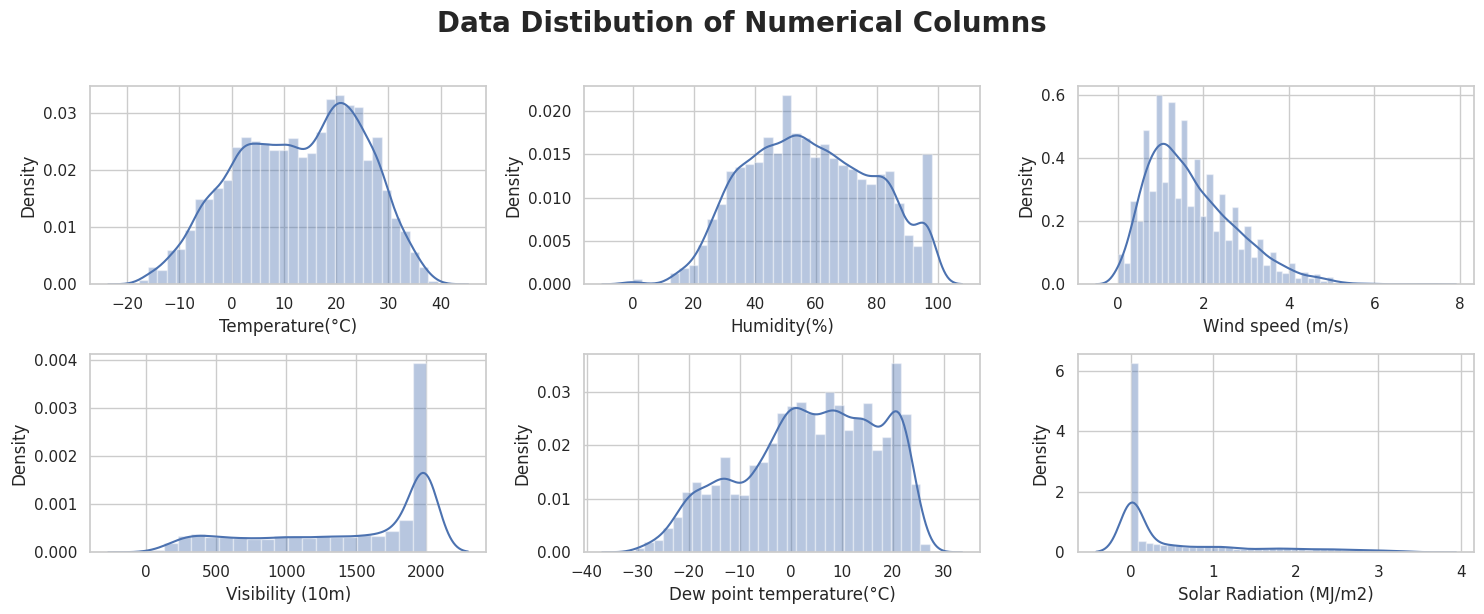

In [40]:
plt.figure(figsize=(15,6))

plt.suptitle('Data Distibution of Numerical Columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_columns):
  plt.subplot(2, 3, i+1)                       # Subplots in 2 rows and 3 columns

  # dist plots
  sns.distplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

We can see that the majority of distributions are right-skewed. The distribution of rainfall, snowfall, and solar radiation is highly skewed to the right. It demonstrates that these columns have many outliers. Some columns are negatively skewed.

#### **Treating Outliers**

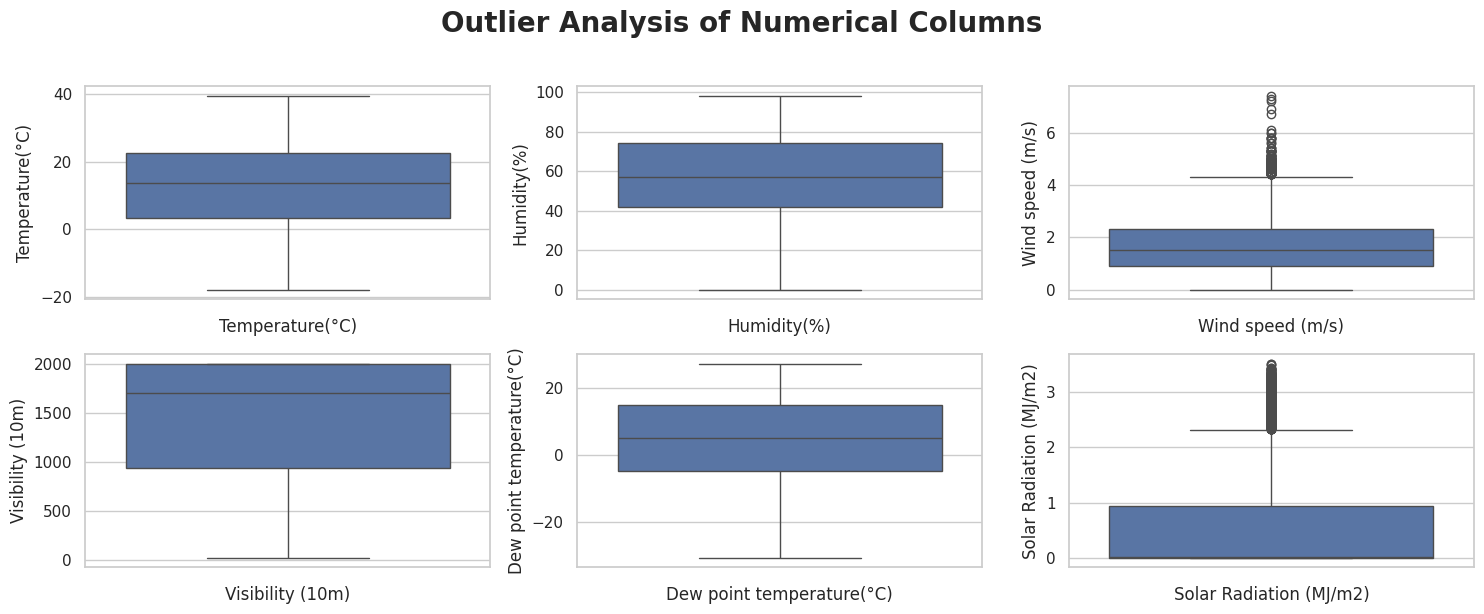

In [41]:
plt.figure(figsize=(15,6))

plt.suptitle('Outlier Analysis of Numerical Columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_columns):
  plt.subplot(2, 3, i+1)            # Subplot in 2 rows and 3 columns

  # countplot
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

#### **Observation:**

* Outliers are visible in the two columns namely 'Wind speed (m/s)' and 'Solar Radiation (MJ/m2)'

* Since we have limited datapoints hence it is advisable not to simply remove the outliers instead of that we should use the clipping method.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

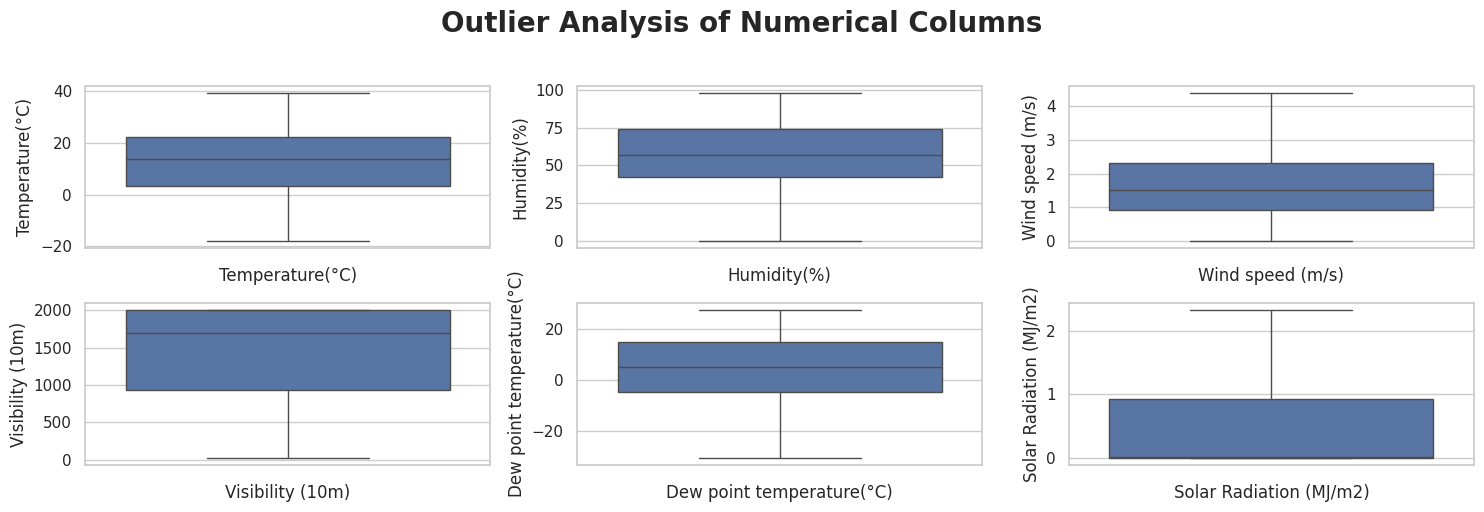

In [42]:
def clip_outliers(df):
    for col in df[numerical_columns]:
        # Using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Using the function to treat outliers
df = clip_outliers(df)

# Checking the boxplot after outlier treatment

plt.figure(figsize=(15,5))

plt.suptitle('Outlier Analysis of Numerical Columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_columns):
  plt.subplot(2, 3, i+1)            # Subplot in 2 rows and 3 columns

  # countplot
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

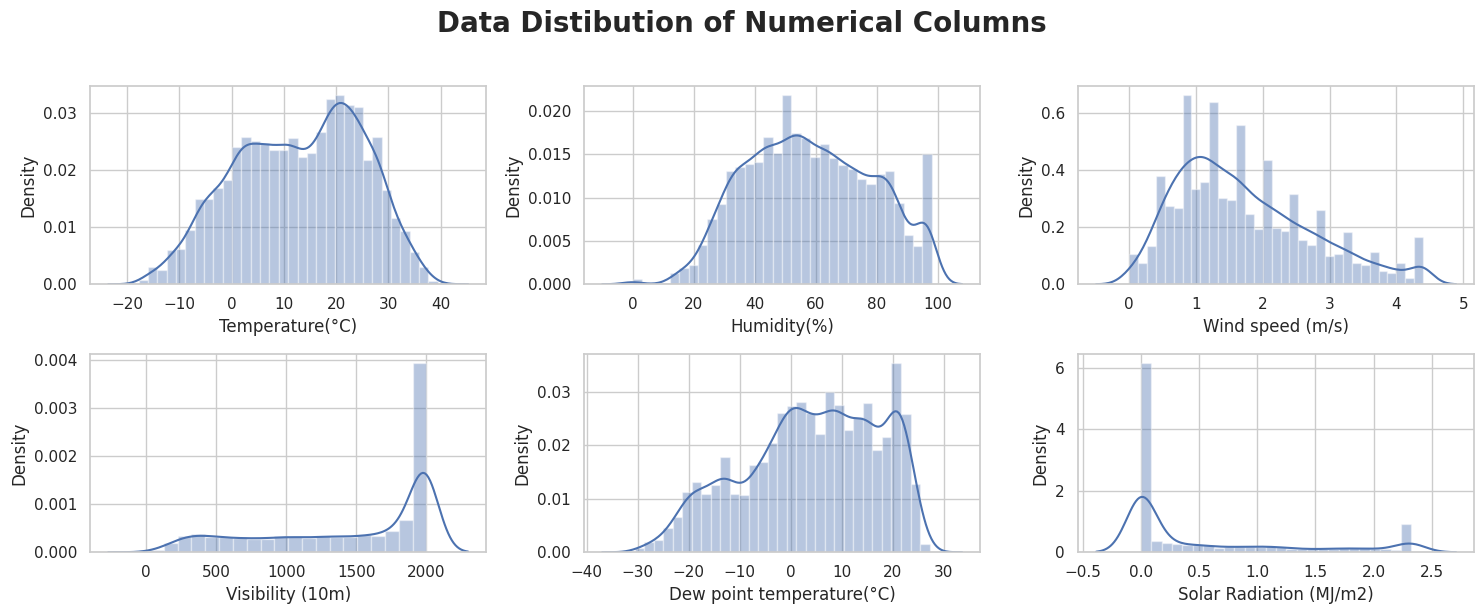

In [43]:
# Checking for distribution after treating outliers.

plt.figure(figsize=(15,6))

plt.suptitle('Data Distibution of Numerical Columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_columns):
  plt.subplot(2, 3, i+1)                       # Subplots 2 rows and 3 columns

  # dist plots
  sns.distplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

We can observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution.





##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier treatment technique I used is **clipping method**.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

I used it because we have limited datapoints, hence it was advisable not to simply remove the outliers but instead of that use the clipping method.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns

categorical_columns

# Unique Values in each categorical columns.
for i in categorical_columns:
  print("No. of unique values in column",f"{i}","is",df[i].nunique())

No. of unique values in column Hour is 24
No. of unique values in column Seasons is 4
No. of unique values in column Holiday is 2
No. of unique values in column Functioning Day is 2
No. of unique values in column month is 12
No. of unique values in column day is 31
No. of unique values in column year is 2


As we know that **encoding** is a technique which is used to convert values in categorical columns into numerical ones that can be used by machine learning algorithms.

In this dataset, out of 7 categorical columns 4 are already encoded which are 'Hour', 'day', 'month', and 'year'. So we need to encode only 3 columns namely 'Seasons', 'Holiday' and 'Functioning Day'.

In [45]:
# Using 'One Hot Encoding' technique for column 'Seasons'

seasons_onehot = pd.get_dummies(df['Seasons'], prefix='Seasons')

# Dropping the original columns
df.drop('Seasons', axis=1, inplace=True)

# Concatenating the one-hot encoded season columns with the rest of the data
df = pd.concat([df, seasons_onehot], axis=1)

# Using 'Numerical Encoding' for columns 'Holiday' and 'Functioning Day'

df['Holiday'] = df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})

df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0           -5.200           37             2.200   
1                204    1           -5.500           38             0.800   
2                173    2           -6.000           39             1.000   
3                107    3           -6.200           40             0.900   
4                 78    4           -6.000           36             2.300   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                    -17.600                    0.000   
1              2000                    -17.600                    0.000   
2              2000                    -17.700                    0.000   
3              2000                    -17.600                    0.000   
4              2000                    -18.600                    0.000   

   Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  month  day  year  \
0         0.000          0.000        0                1      1   12  2017   
1         0.000          0.000        0                1      1   12  2017   
2         0.000          0.000        0                1      1   12  2017   
3         0.000          0.000        0                1      1   12  2017   
4         0.000          0.000        0                1      1   12  2017   

   Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0               0               0               0               1  
1               0               0               0               1  
2               0               0               0               1  
3               0               0               0               1  
4               0               0               0               1

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used two different categorical encoding techniques: **'One Hot Encoding'** and **'Numerical Encoding'**.

1. **One Hot Encoding** for column 'Seasons':

 * One Hot Encoding is used for categorical variables when there is no inherent ordinal relationship among the categories and each category is distinct.

 * In this case, the 'Seasons' column is a nominal categorical variable as the seasons (Spring, Summer, Autumn and Winter) don't have a natural order.

 * It transforms each category into a binary column, indicating the presence or absence of that category.

 * This technique avoids creating a false ordinal relationship between the seasons.


2. **Numerical Encoding** for columns 'Holiday' and 'Functioning Day':

  * In these two columns there are only two unique values so encoding them simply with 0 and 1 was easy for further study.

  * In this case, for 'Holiday' and 'Functioning Day,' I have used numerical encoding with {'Holiday': 1, 'No Holiday': 0} and {'Yes': 1, 'No': 0} mappings respectively.

### **This dataset primarily consists of numerical and categorical features related to bike usage, weather conditions and time-related information so there is no relevance of 'Textual Data Preprocessing' here. So I am skipping this step.**

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [46]:
# Expand Contraction

#### 2. Lower Casing

In [47]:
# Lower Casing

#### 3. Removing Punctuations

In [48]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [49]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [50]:
# Remove Stopwords

In [51]:
# Remove White spaces

#### 6. Rephrase Text

In [52]:
# Rephrase Text

#### 7. Tokenization

In [53]:
# Tokenization

#### 8. Text Normalization

In [54]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [55]:
# POS Taging

#### 10. Text Vectorization

In [56]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

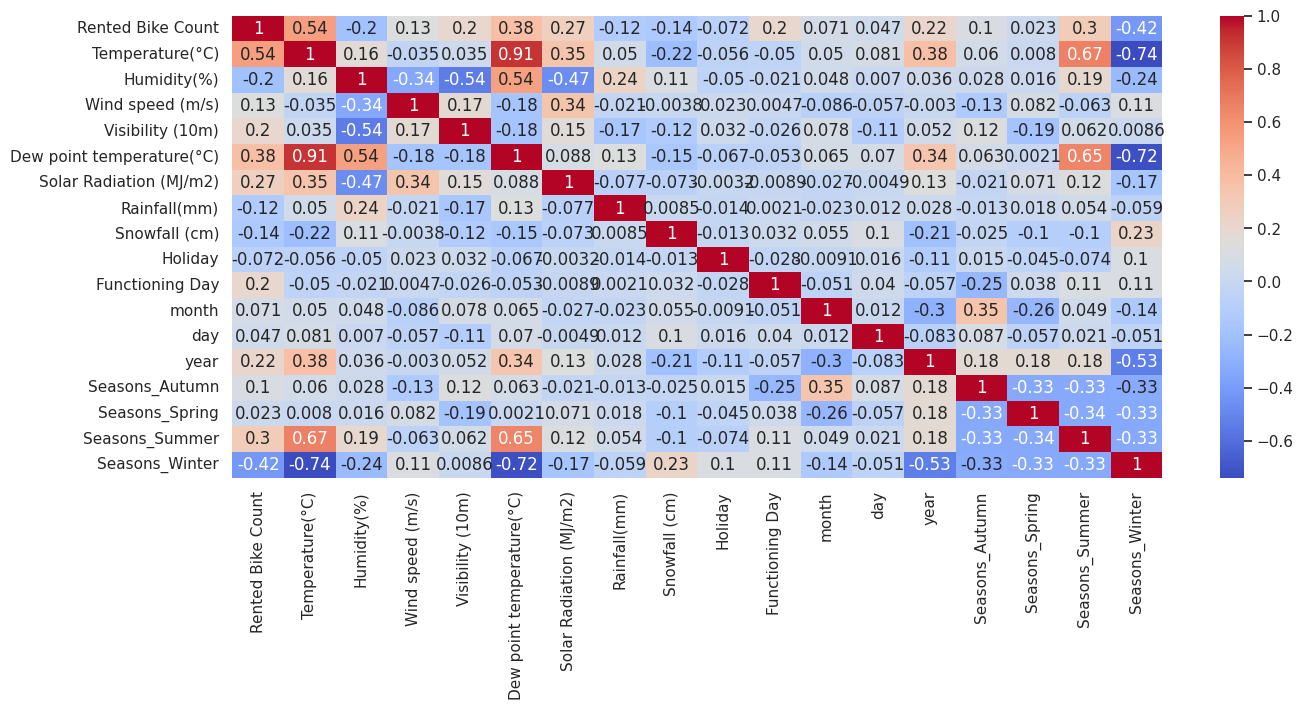

In [57]:
# Manipulate Features to minimize feature correlation and create new features

# Plotting correlation heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Now we need to remove highly correlated columns which can reduce overfitting and improve the performance of the model.

In [58]:
# Finding correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # Getting the name of column
                col_corr.add(colname)
    return col_corr

# Checking the highly correlated features
correlation(df, 0.75)          # Setting threshold of 0.75

{'Dew point temperature(°C)'}

As we can see from above correlation heatmap, 'Dew point temperature(°C)' and 'Temperature(°C)' have a correlation coefficient of 0.91 and 'Dew point temperature(°C)' is less correlated to our target variable. Thus, I am dropping 'Dew point temperature(°C)'.

In [59]:
# Droping 'Dew point temperature(°C)' column due to multi-collinearity

df.drop('Dew point temperature(°C)', axis=1, inplace=True)

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

def Calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

# Selecting all the columns except those which are encoded one.
df1 = df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
          'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'month', 'day', 'year']]

Calc_vif(df1[[i for i in df1.describe().columns]])

VIF Factor                 features
0        4.029        Rented Bike Count
1        5.166          Temperature(°C)
2       24.495              Humidity(%)
3        4.809         Wind speed (m/s)
4       10.570         Visibility (10m)
5        2.887  Solar Radiation (MJ/m2)
6        1.101             Rainfall(mm)
7        1.146            Snowfall (cm)
8        1.064                  Holiday
9       32.862          Functioning Day
10       4.768                    month
11       4.427                      day
12      89.736                     year

As we can see that VIF factor of 'year' is too large hence I will remove the year from our data to build our model

In [61]:
# Droping year column due to multi-collinearity

df.drop('year', axis=1, inplace=True)

##### What all feature selection methods have you used  and why?

**Method Used:** Calculated the Variance Inflation Factor (VIF) for each feature to identify multicollinearity.

**Reasons for Using VIF:**

* VIF helps in identifying features that are highly correlated with others which is crucial for avoiding multicollinearity in regression models.

* It provides a quantitative measure of how much the variance of an estimated regression coefficient increases if predictors are correlated.

* Used to address multicollinearity issues to prevent overfitting.

##### Which all features you found important and why?

I have selected features with low VIF (indicating lower multicollinearity). In that case I found all the columns except 'year' have comparatively low VIF.
So with the criteria I decided all the features are important for further study only exception is the column 'year' which I dropped.

**Reason:**

The feature with low VIF have lower multicollinearity and are less likely to cause issues in regression models.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

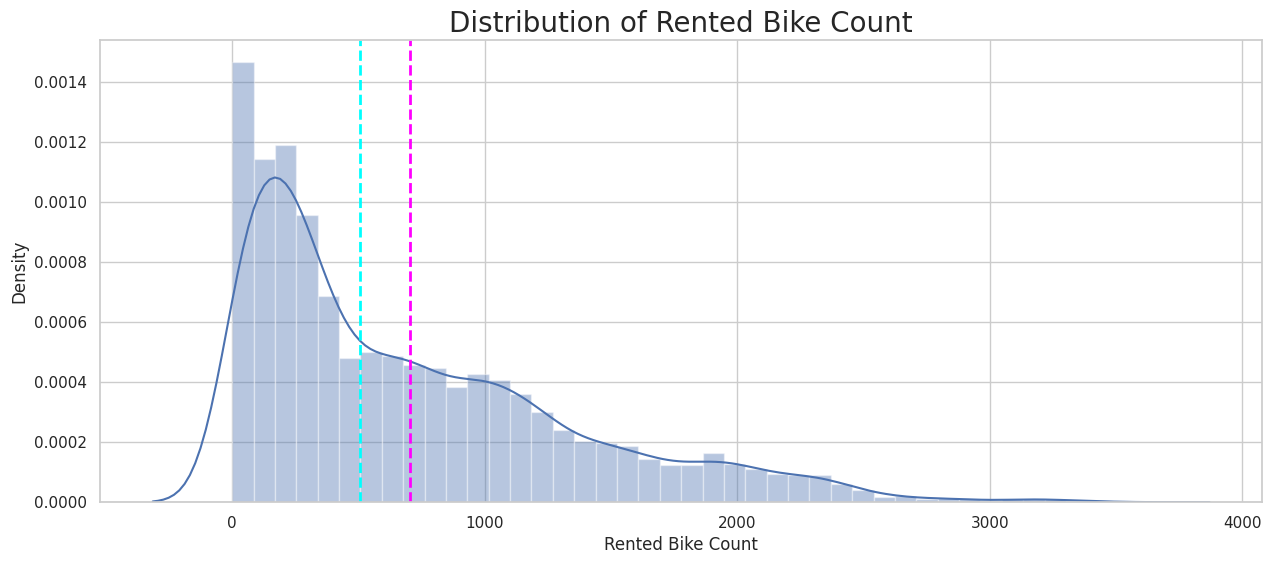


Skewness of the target variable: 1.1534281773679014


In [62]:
# Visualizing the distribution of the target variable

plt.figure(figsize=(15, 6))
sns.distplot(df['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count', fontsize=20)
plt.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['Rented Bike Count'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

# Skew of the target variable
print(f"\nSkewness of the target variable: {df['Rented Bike Count'].skew()}")


**From distribution plot and normality test we can see that the distribution of the target variable is positively skewed. So we definitely need to transform the target variable.**

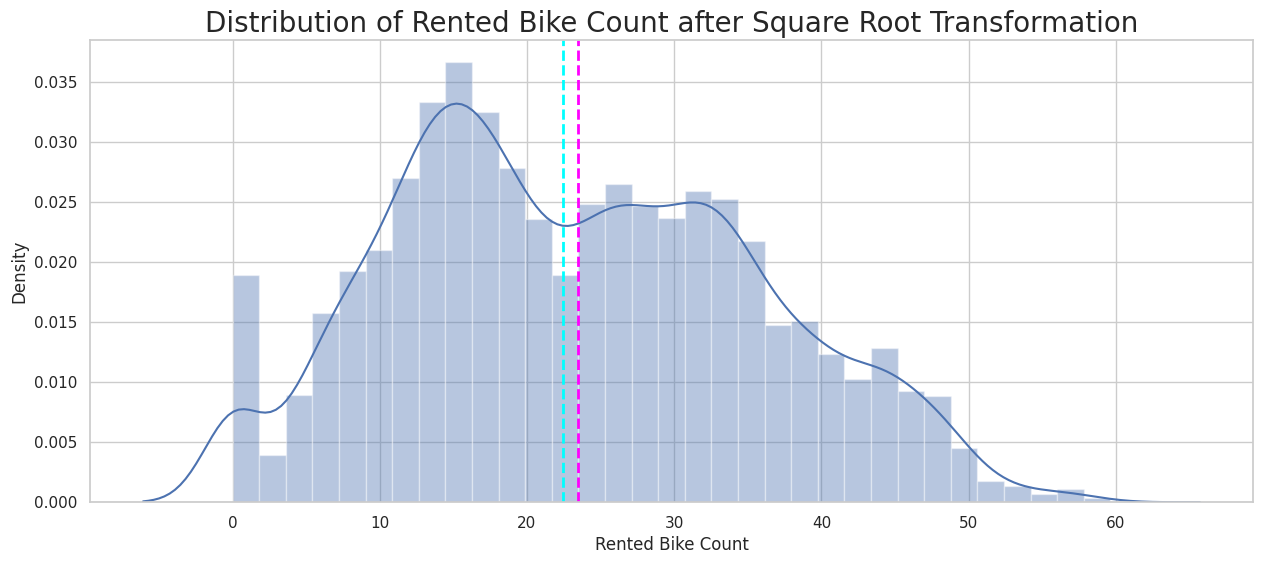


Skewness of the target variable after Square Root Transformation: 0.237362090985412


In [63]:
plt.figure(figsize=(15, 6))
sns.distplot(np.sqrt(df['Rented Bike Count']))
plt.title('Distribution of Rented Bike Count after Square Root Transformation', fontsize=20)
plt.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

# Skew of the target variable
print(f"\nSkewness of the target variable after Square Root Transformation: {np.sqrt(df['Rented Bike Count']).skew()}")

**After Square Root Transformation we can clearly see that the target variable looks normally distrubuted and its skewness has also reduced significantly. So let's finally transorm the target variable**

In [64]:
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count']) # Transforming the target variable

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* Dimensionality reduction is typically considered when dealing with a large number of features or when there are redundancies in the data.

* Neither of any such situation here as the dataset has a manageable number of features and they are all relevant.

So I do not find the need of dimensionality reduction here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

It is very much evident from the above distribution plot that the traget variable (i.e. Rented Bike Count) is not concentrated in a narrow range and is normally distributed accross wide range of values. So now this dataset is not imbalanced.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

### 8. Data Splitting

In [66]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = df.drop('Rented Bike Count', axis=1)
y= df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)  # train test split

print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


##### What data splitting ratio have you used and why?

### 9. Data Scaling

In [67]:
# Scaling your data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

Answer Here.

## ***7. ML Model Implementation***

In [68]:

# Empty list for appending performance metric score
model_result = []

def predict(ml_model, model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  '''

  # Model fitting
  model = ml_model.fit(X_train,y_train)

  # Predicting values
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Visualizing best fit line on test data
  plt.figure(figsize=(15,6))
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.title('Best fit line on test data', fontsize=20)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mse(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2(y_train, y_train_pred),3)
  train_MAE = round(mae(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print("\nEvaluation metrics on train data:\n")
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('='*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mse(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2(y_test, y_test_pred),3)
  test_MAE = round(mae(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print("\nEvaluation metrics on test data:\n")
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('='*150)

  # Visualizing actual vs predicted on test data
  plt.figure(figsize=(15,6))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.title('Actual vs Predicted on test data', fontsize=20)
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('='*150)

  '''Actual vs Predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('='*150)

  # Using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})

### ML Model - 1


Evaluation metrics on train data:

train MSE : 54.12
train RMSE : 7.357
train MAE : 5.639
train R2 : 0.653
train Adj R2 : 0.652

Evaluation metrics on test data:

test MSE : 53.132
test RMSE : 7.289
test MAE : 5.622
test R2 : 0.648
test Adj R2 : 0.645


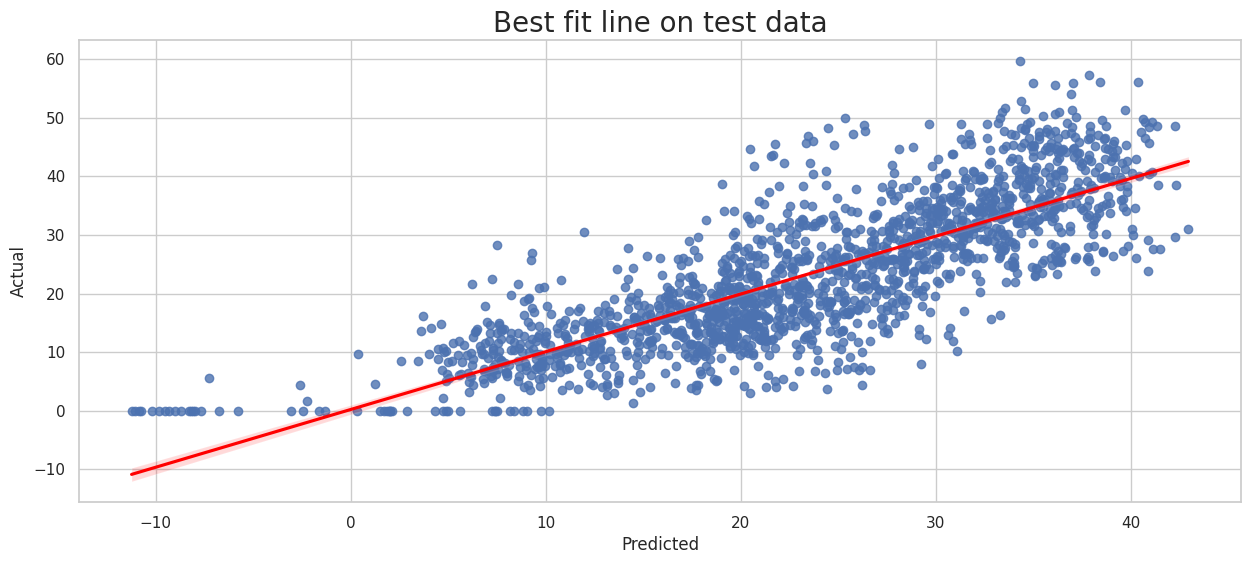

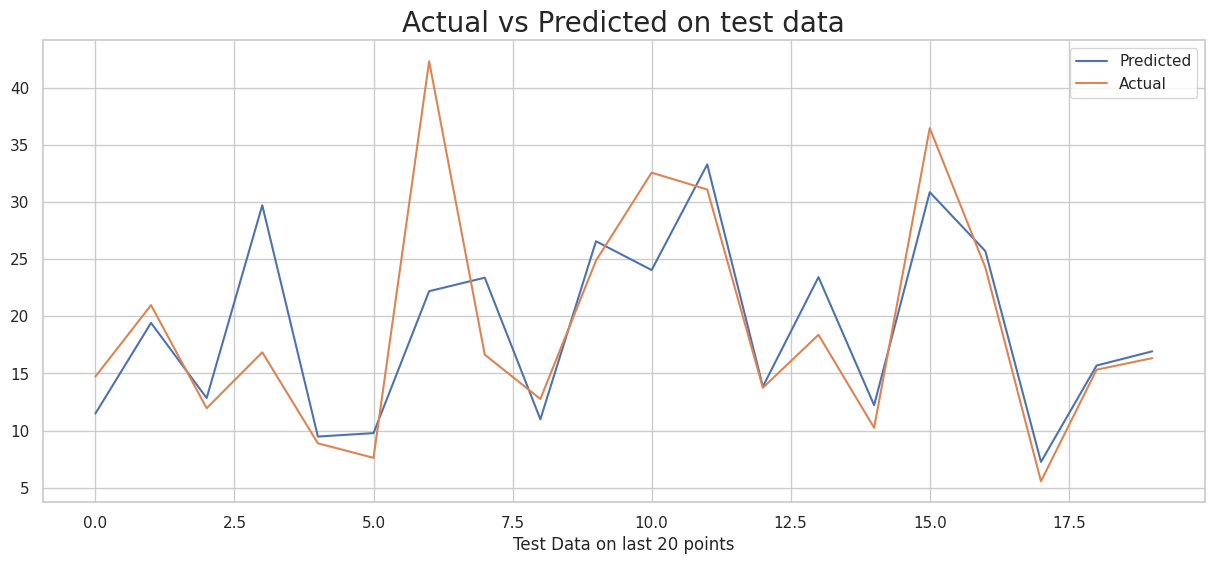

            1425   7993   897     5813   1708
y_actual  14.731 20.976 11.958  16.852  8.888
y_predict 11.493 19.426 12.846  29.715  9.479
error      3.238  1.550 -0.888 -12.863 -0.591


In [69]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
predict(LinearRegression(), 'LinearRegression')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

# Print the result of model 'LinearRegression'
for result in model_result:
  if result.get('model') == 'LinearRegression':
    for key, value in result.items():
      print(f'{key}: {value}')



model: LinearRegression
train MSE: 54.12
test MSE: 53.132
train RMSE: 7.357
test RMSE: 7.289
train MAE: 5.639
test MAE: 5.622
train R2: 0.653
test R2: 0.648
train Adj R2: 0.652
test Adj R2: 0.645


#### 2. Cross- Validation & Hyperparameter Tuning

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.6506141355799537

Evaluation metrics on train data:

train MSE : 54.12
train RMSE : 7.357
train MAE : 5.639
train R2 : 0.653
train Adj R2 : 0.652

Evaluation metrics on test data:

test MSE : 53.132
test RMSE : 7.289
test MAE : 5.622
test R2 : 0.648
test Adj R2 : 0.645


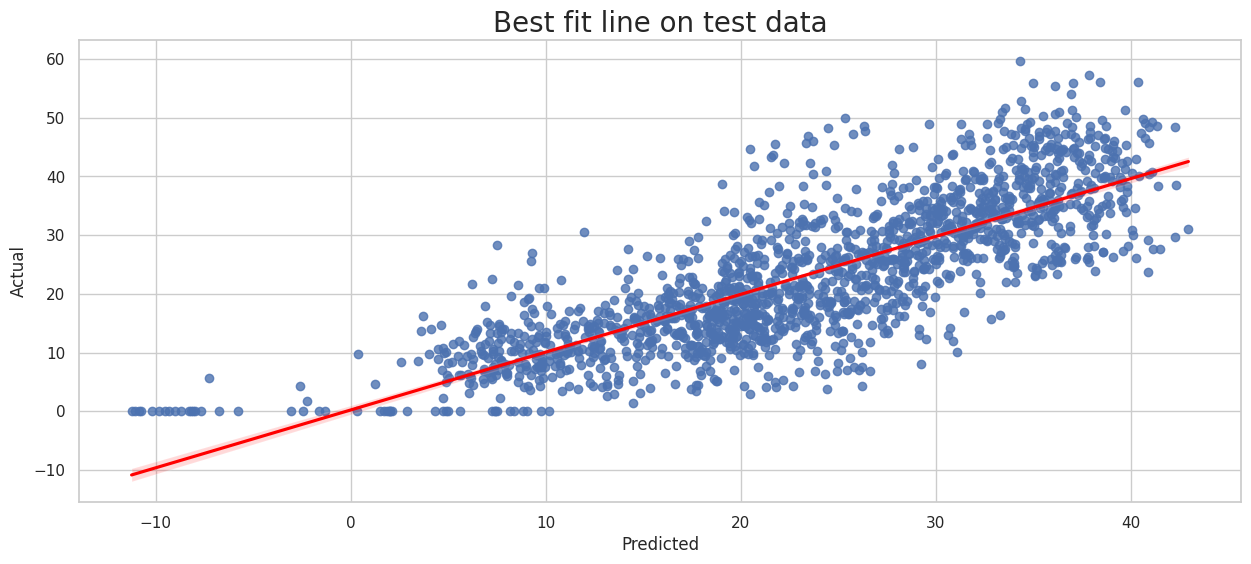

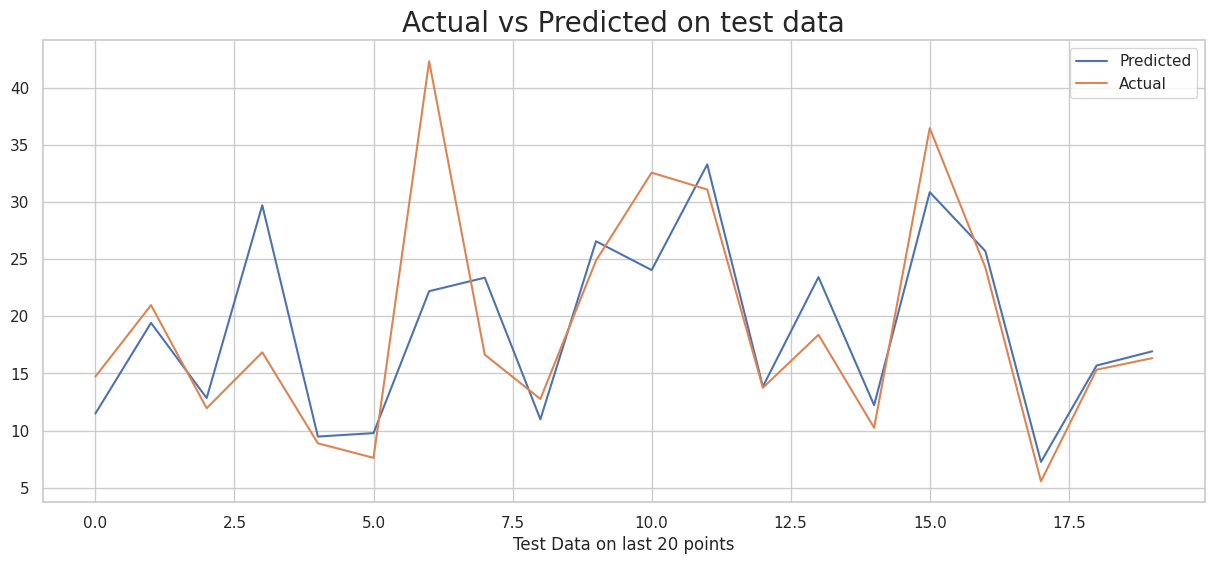

            1425   7993   897     5813   1708
y_actual  14.731 20.976 11.958  16.852  8.888
y_predict 11.493 19.426 12.846  29.715  9.479
error      3.238  1.550 -0.888 -12.863 -0.591


In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define the model
reg = LinearRegression()
# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}
# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)


# Use the best parameter to train the model
best_reg = grid_search.best_estimator_


# Visualizing evaluation Metric Score chart
predict(best_reg, 'LinearRegression')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2


Evaluation metrics on train data:

train MSE : 12.718
train RMSE : 3.566
train MAE : 2.361
train R2 : 0.918
train Adj R2 : 0.918

Evaluation metrics on test data:

test MSE : 26.575
test RMSE : 5.155
test MAE : 3.577
test R2 : 0.824
test Adj R2 : 0.822


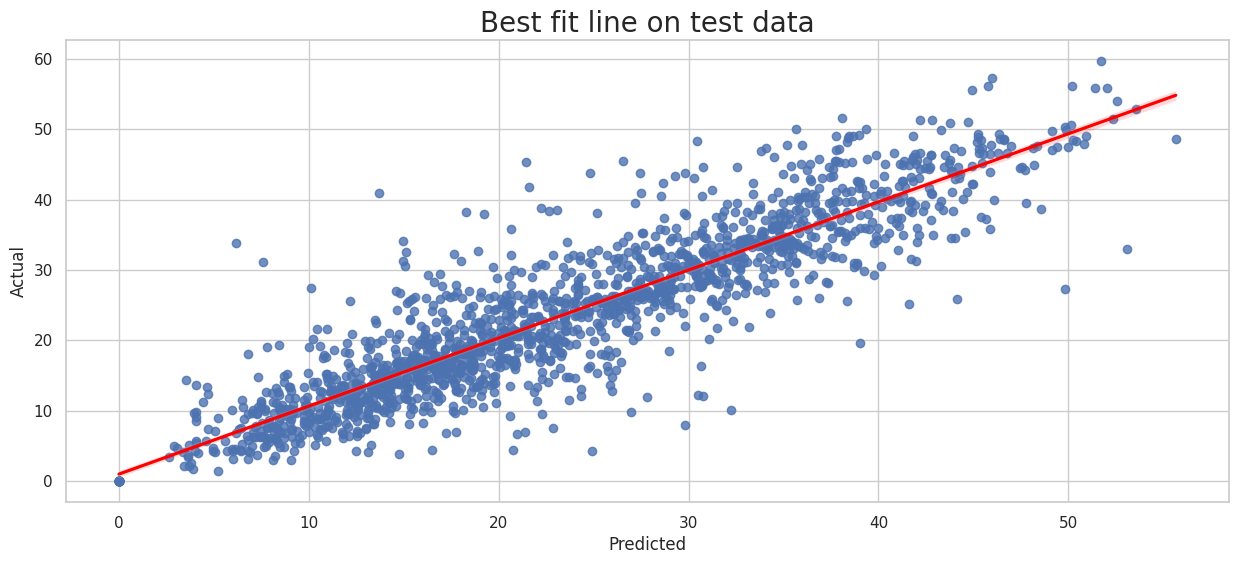

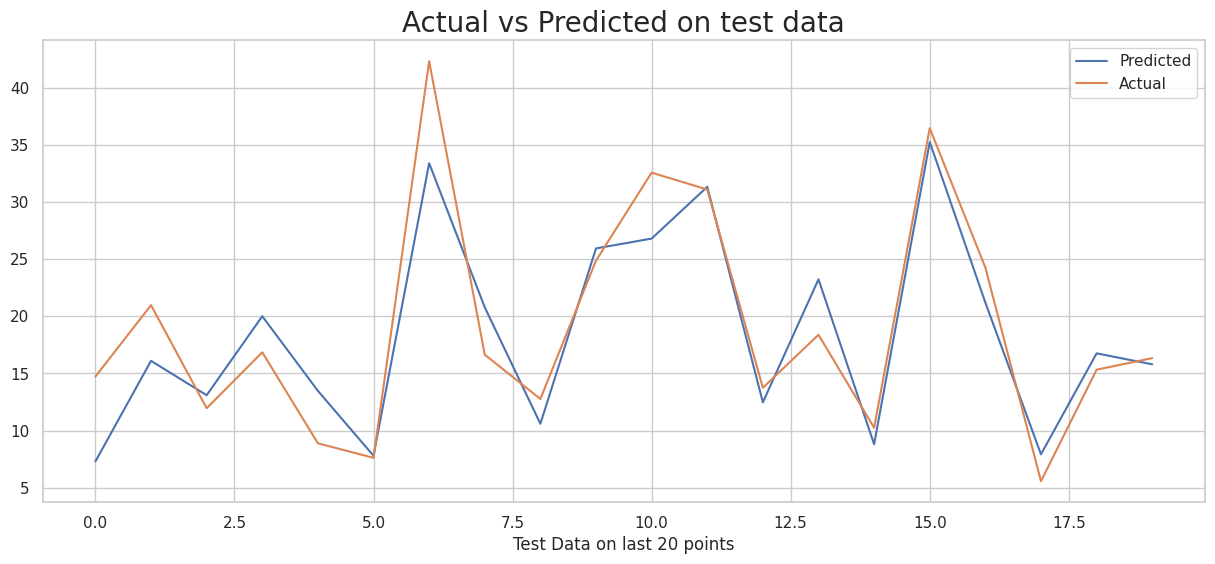

            1425   7993   897    5813   1708
y_actual  14.731 20.976 11.958 16.852  8.888
y_predict  7.305 16.104 13.097 20.009 13.479
error      7.426  4.872 -1.139 -3.157 -4.591


In [72]:
predict(KNeighborsRegressor(n_neighbors=3),'KNN')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

# Print the result of model 'KNN'
for result in model_result:
  if result.get('model') == 'KNN':
    for key, value in result.items():
      print(f'{key}: {value}')

model: KNN
train MSE: 12.718
test MSE: 26.575
train RMSE: 3.566
test RMSE: 5.155
train MAE: 2.361
test MAE: 3.577
train R2: 0.918
test R2: 0.824
train Adj R2: 0.918
test Adj R2: 0.822


#### 2. Cross- Validation & Hyperparameter Tuning

Best parameters:  {'weights': 'distance', 'n_neighbors': 5}
Best R2 score:  0.8143795656483828

Evaluation metrics on train data:

train MSE : 0.0
train RMSE : 0.0
train MAE : 0.0
train R2 : 1.0
train Adj R2 : 1.0

Evaluation metrics on test data:

test MSE : 25.815
test RMSE : 5.081
test MAE : 3.535
test R2 : 0.829
test Adj R2 : 0.827


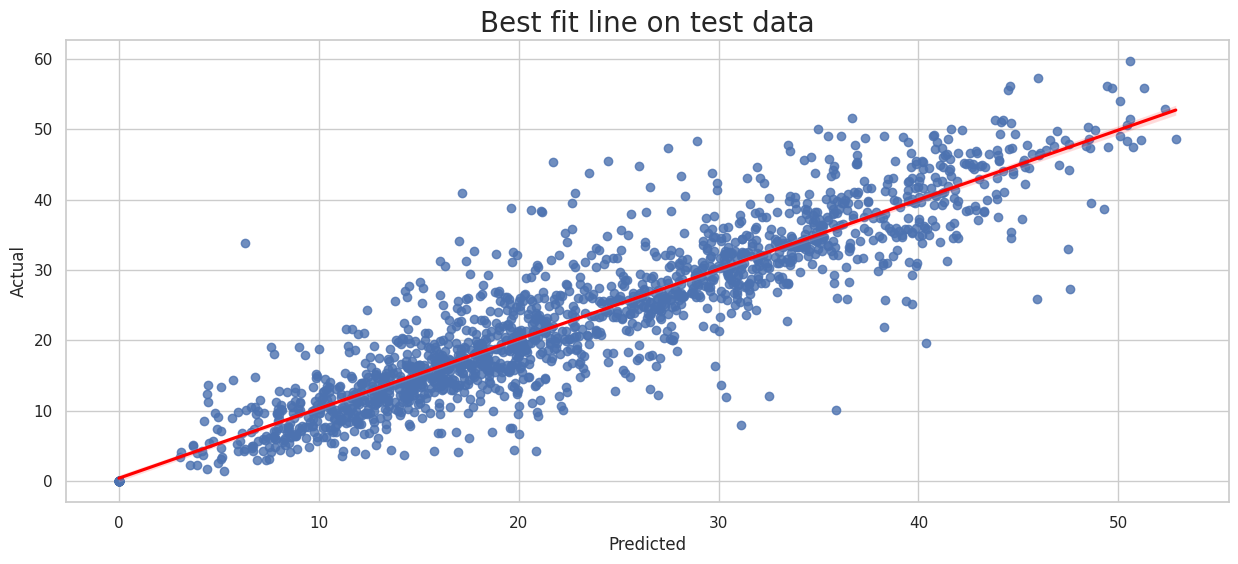

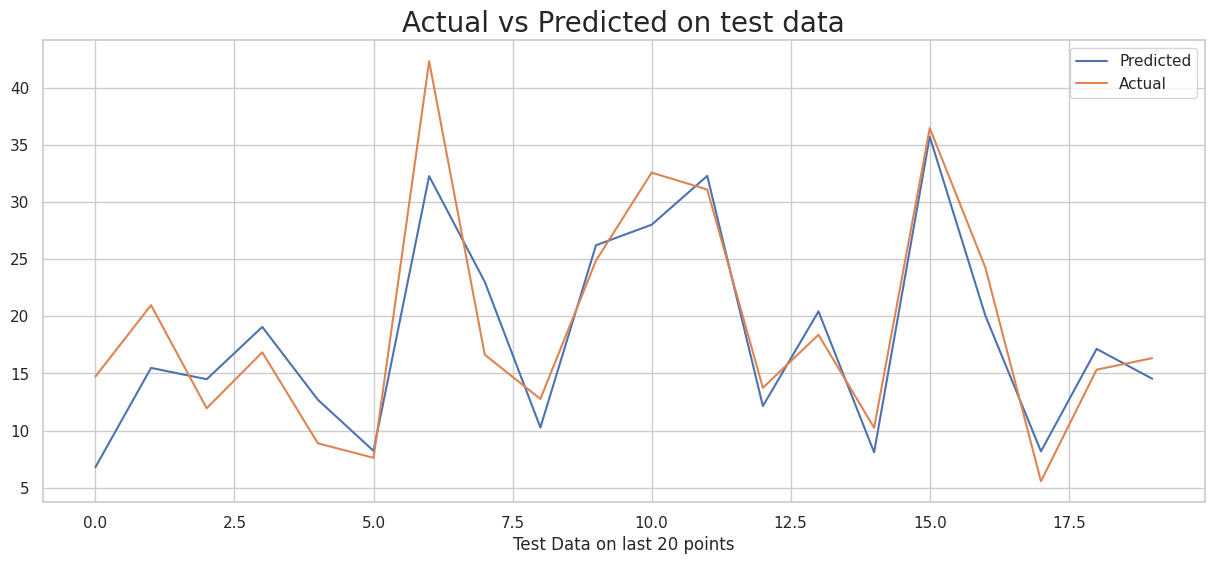

            1425   7993   897    5813   1708
y_actual  14.731 20.976 11.958 16.852  8.888
y_predict  6.796 15.487 14.494 19.071 12.697
error      7.935  5.489 -2.535 -2.218 -3.809


In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define the model
knn = KNeighborsRegressor()

# Define the parameters to be optimized
param_dist = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Perform randomized search
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best R2 score: ", random_search.best_score_)

# Use the best parameter to train the model
best_knn_random = random_search.best_estimator_

# Visualizing evaluation Metric Score chart
predict(best_knn_random, 'KNN (Random Search)')


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3


Evaluation metrics on train data:

train MSE : 2.004
train RMSE : 1.416
train MAE : 0.93
train R2 : 0.987
train Adj R2 : 0.987

Evaluation metrics on test data:

test MSE : 14.399
test RMSE : 3.795
test MAE : 2.554
test R2 : 0.905
test Adj R2 : 0.904


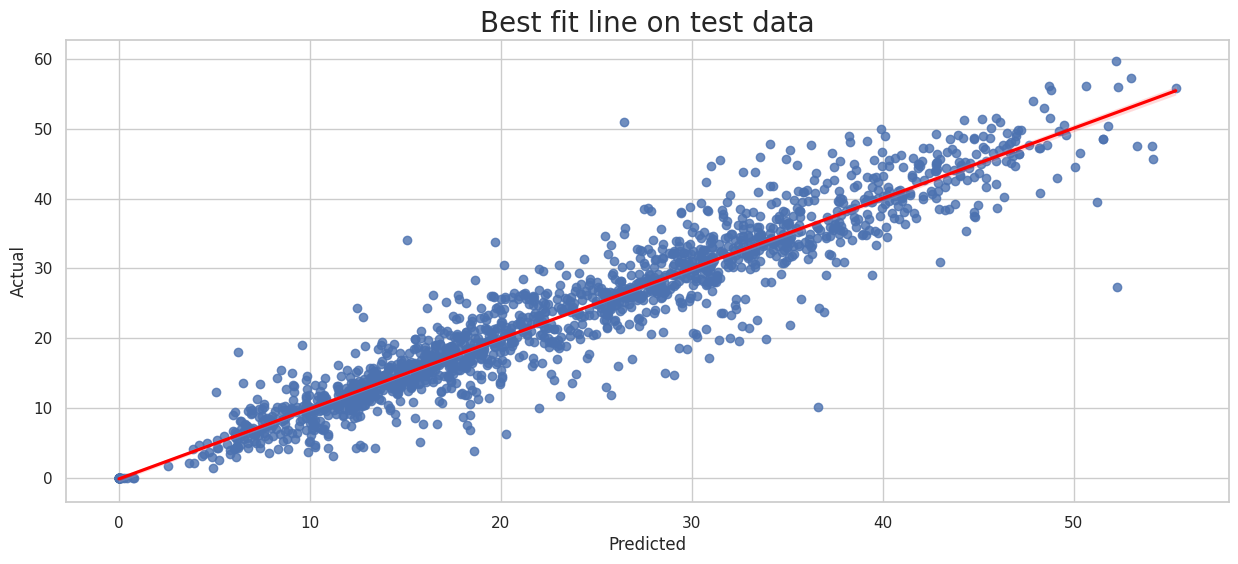

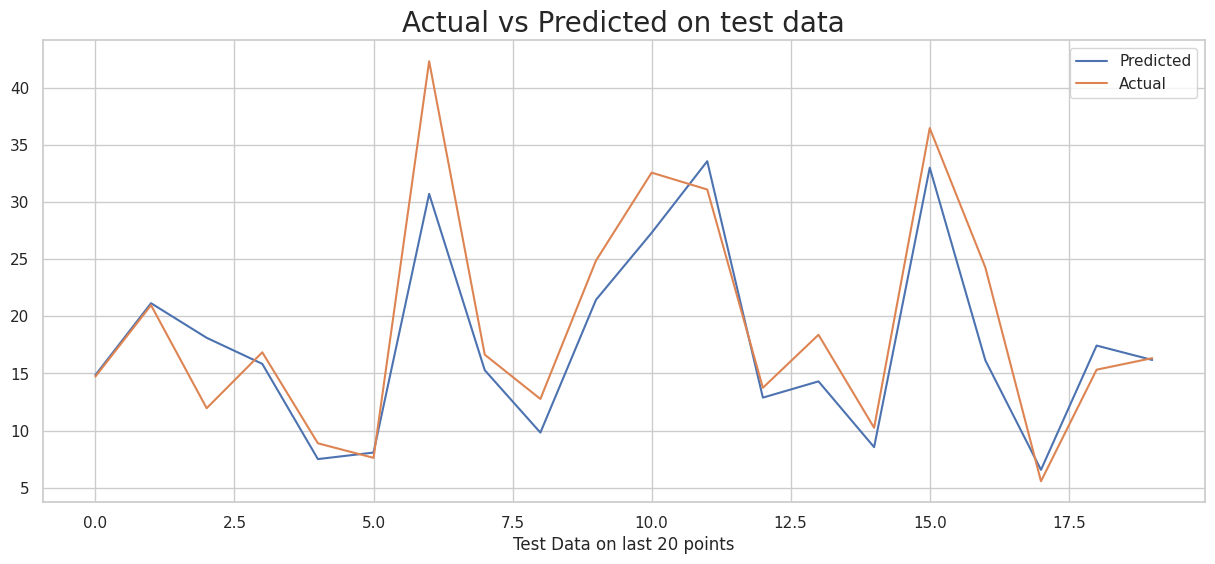

            1425   7993   897    5813  1708
y_actual  14.731 20.976 11.958 16.852 8.888
y_predict 14.860 21.147 18.121 15.840 7.507
error     -0.130 -0.171 -6.163  1.013 1.381


In [75]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

predict(RandomForestRegressor(random_state=0), 'Random Forest')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [76]:
# Visualizing evaluation Metric Score chart

# Print the result of model 'Random Forest'
for result in model_result:
  if result.get('model') == 'Random Forest':
    for key, value in result.items():
      print(f'{key}: {value}')

model: Random Forest
train MSE: 2.004
test MSE: 14.399
train RMSE: 1.416
test RMSE: 3.795
train MAE: 0.93
test MAE: 2.554
train R2: 0.987
test R2: 0.905
train Adj R2: 0.987
test Adj R2: 0.904


#### 2. Cross- Validation & Hyperparameter Tuning

Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best R2 score:  0.906266958450297

Evaluation metrics on train data:

train MSE : 2.005
train RMSE : 1.416
train MAE : 0.931
train R2 : 0.987
train Adj R2 : 0.987

Evaluation metrics on test data:

test MSE : 14.376
test RMSE : 3.792
test MAE : 2.553
test R2 : 0.905
test Adj R2 : 0.904


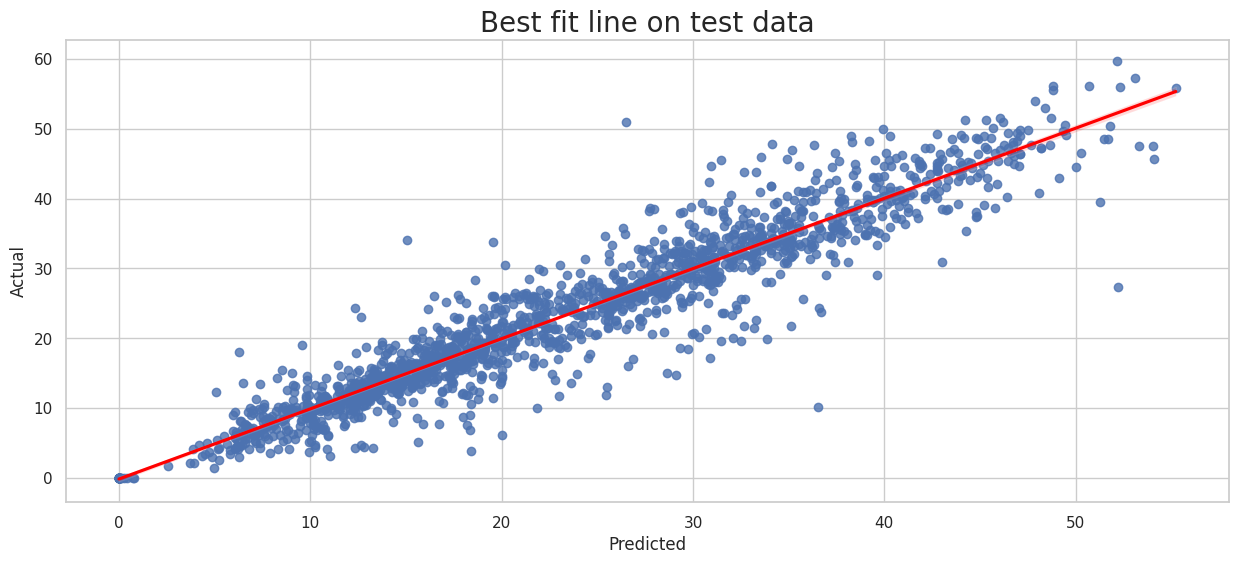

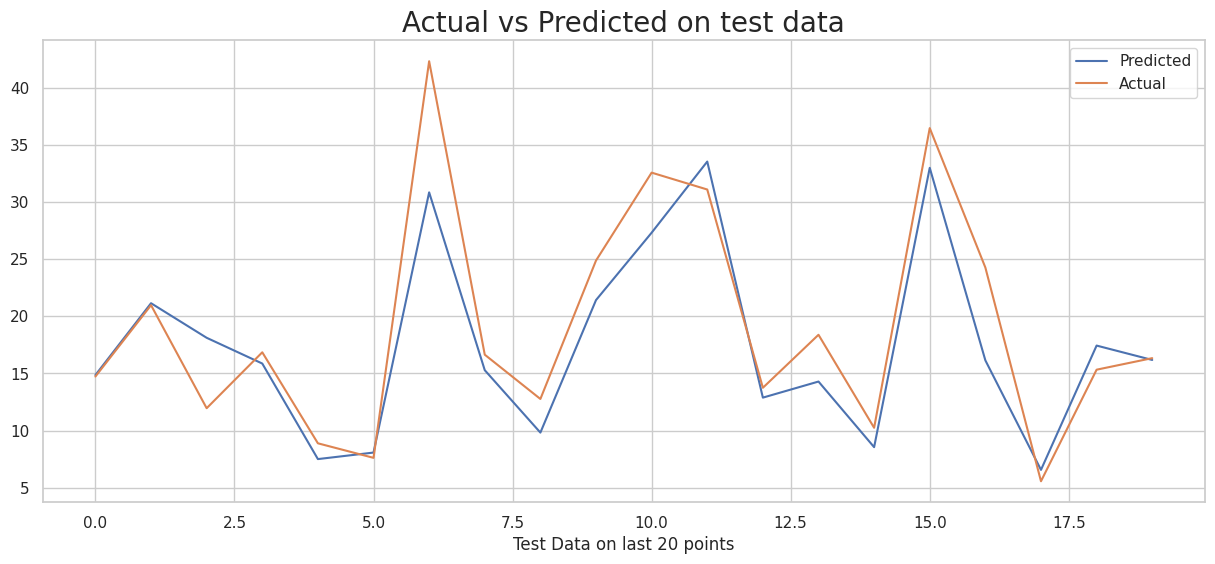

            1425   7993   897    5813  1708
y_actual  14.731 20.976 11.958 16.852 8.888
y_predict 14.860 21.147 18.122 15.868 7.507
error     -0.130 -0.171 -6.163  0.984 1.381


In [77]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=0)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=0)
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", random_search.best_params_)
print("Best R2 score: ", random_search.best_score_)

# Use the best parameters to train the model
best_rf = random_search.best_estimator_

# Visualizing evaluation Metric Score chart
predict(best_rf, 'Random Forest')



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [78]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [79]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***